# Project Implementation via CRISP-DM

01. Business Understanding

Gemineye Emporium is an expanding jewelry dealer. The firm has recently begun a new wave of expansion across the country. While this should be good for business, it also comes with increased costs and the need for increased operational efficiency.
One such area is the nedd to accurately price their jewelry products. At the present, their jewelry items are being priced by geomologists and experts. However, this process can be quite a lengthy one, not to mention expensive, as most gemologists are well-sought and expensive to call upon. Gemineye would love to explore the use of machine learning for predicting the optimal prices at which their jewelry should be sold. Utilizing ML for this task would allow the company

1. improve the speed and scalability of their pricing process, and 
2. cut down on the cost of hiring gem experts

02.Data Understanding

With the Business Understanding out of the way, the next step is to understand the data to be obtained and used for the task. This will involve the process of Explortory Data Analysis (EDA).

EDA is the process of sifting through data with the goal of extracting insights. These insights allow a better understanding of the available data and what can be done with it. they can also be used for guided preparation of the dataset in the appropriate manner. Just like regular analysis, EDA begins with a set of question and/or hypotheses. The EDA process with then prove or disprove these hypotheses, and hopefully, reveal other points of inquiry along the way. 

The required libraries and packages are imported first. The EDA process is carried out here as shown below. The high-level step to follow are:

    1. Import the required libraries
    2. Load in the dataset
    3. Analyze and observe its properties.
        * Missing data
        * Outliers
        * Inconsistent values
        * Low categorical cardinality
        * Data imbalance
        * Feature correlations
    4. Report on these properties and how they might affects our final solution

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Set visualisation theme
sns.set()

In [2]:
# Import the dataset
data = pd.read_csv("Jewelry_Dataset.csv")

data.columns = [
    "Order_Datetime",
    "Order_ID",
    "Product_id",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem" 
]

In [3]:
# Peak at the data
data.head(n = 5)

,Order_Datetime,Order_ID,Product_id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1.924900e+18,1.806830e+18,1,1.806830e+18,NaN,NaN,212.14,1.515920e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1.925510e+18,1.842210e+18,1,1.806830e+18,jewelry.pendant,1.0,54.66,1.515920e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1.925630e+18,1.835570e+18,1,1.806830e+18,jewelry.pendant,0.0,88.90,1.515920e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1.925740e+18,1.873940e+18,1,1.806830e+18,jewelry.necklace,0.0,417.67,1.515920e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1.925760e+18,1.835570e+18,1,1.806830e+18,jewelry.earring,1.0,102.27,1.515920e+18,NaN,red,gold,NaN


In [4]:
# Check for missing values
data.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_id            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

In [5]:
# Data shape
data.shape

(95910, 13)

In [6]:
# Feature cardinality
data.nunique()

Order_Datetime    74504
Order_ID          32909
Product_id         1706
SKU_Quantity          1
Category_ID           2
Category            218
Brand_ID             37
Price_USD          3166
User_ID             396
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [7]:
# Data description
data.describe()

,Order_ID,Product_id,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815968e+18,1.0,1.805948e+18,8.891061e+16,362.213017,1.512648e+18
std,1.934750e+17,2.136788e+17,0.0,2.083947e+16,3.559661e+17,444.157665,2.374826e+16
min,1.924900e+18,1.313550e+18,1.0,1.313680e+18,0.000000e+00,0.990000,1.313550e+18
25%,2.379732e+18,1.515970e+18,1.0,1.806830e+18,0.000000e+00,145.620000,1.515920e+18
50%,2.524285e+18,1.956660e+18,1.0,1.806830e+18,1.000000e+00,258.770000,1.515920e+18
75%,2.644350e+18,1.956660e+18,1.0,1.806830e+18,1.000000e+00,431.370000,1.515920e+18
max,2.719020e+18,2.541960e+18,1.0,1.806830e+18,1.550610e+18,34448.600000,1.554300e+18


In [8]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  float64
 2   Product_id      95910 non-null  float64
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 9.5+ MB


In [9]:
# Duplicate values
num_duplicated = len(data.loc[data.duplicated()])

In [10]:
print(f"Number of duplicate records:", num_duplicated)

Number of duplicate records: 2955


In [11]:
# Feature with a cardinality of 1 (invarient features)
invariant_features = data.nunique()[data.nunique() == 1].index.tolist()

In [12]:
invariant_features

['SKU_Quantity']

In [13]:
# Check for label distribution (skewness of the data)
data["Price_USD"].skew()

18.95906072625981

In [14]:
# Price hurtosis
data["Price_USD"].kurtosis()

1054.8979068506155

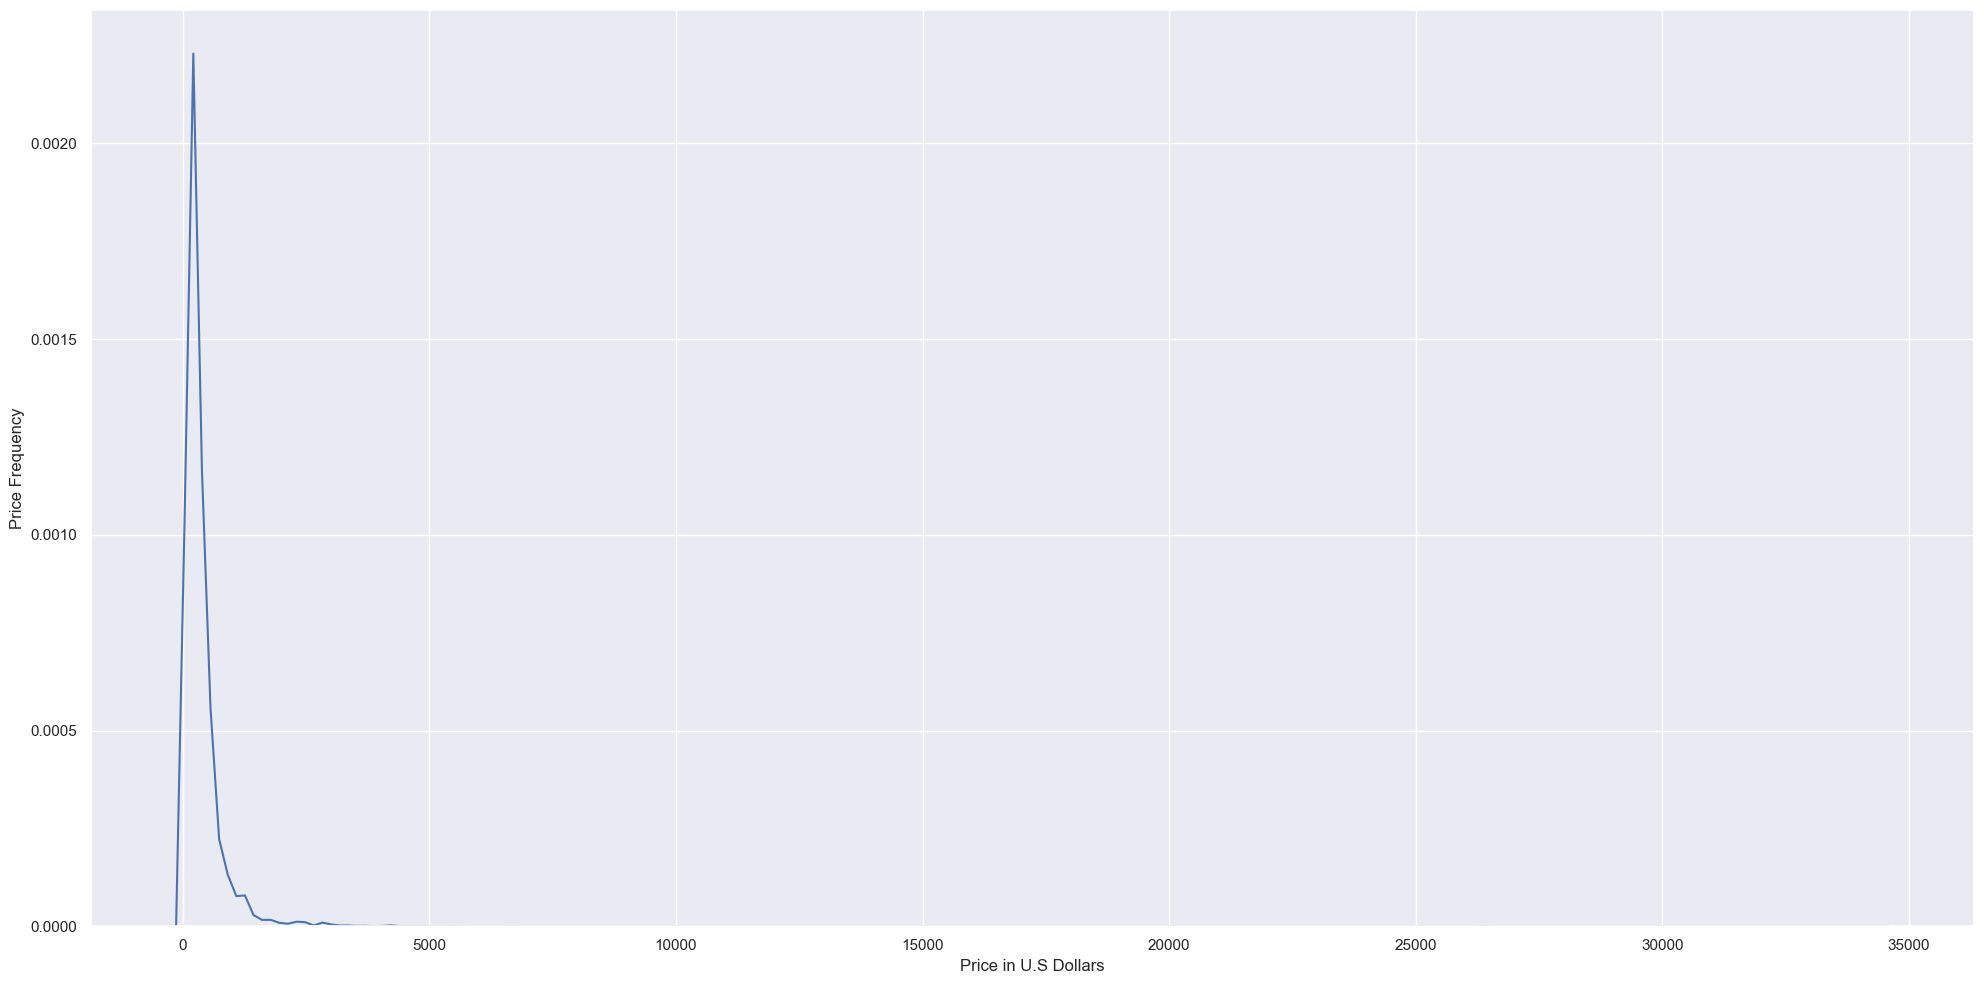

In [15]:
# Visualize price distribution
plt.figure(figsize = (20, 10))

sns.kdeplot(data=data, x = "Price_USD")

plt.xlabel("Price in U.S Dollars")
plt.ylabel("Price Frequency")

plt.tight_layout()
plt.show()

In [16]:
# Target gender analysis
data["Target_Gender"].value_counts()

Target_Gender
f    47379
m      364
Name: count, dtype: int64

In [17]:
# Target gender analysis
data["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

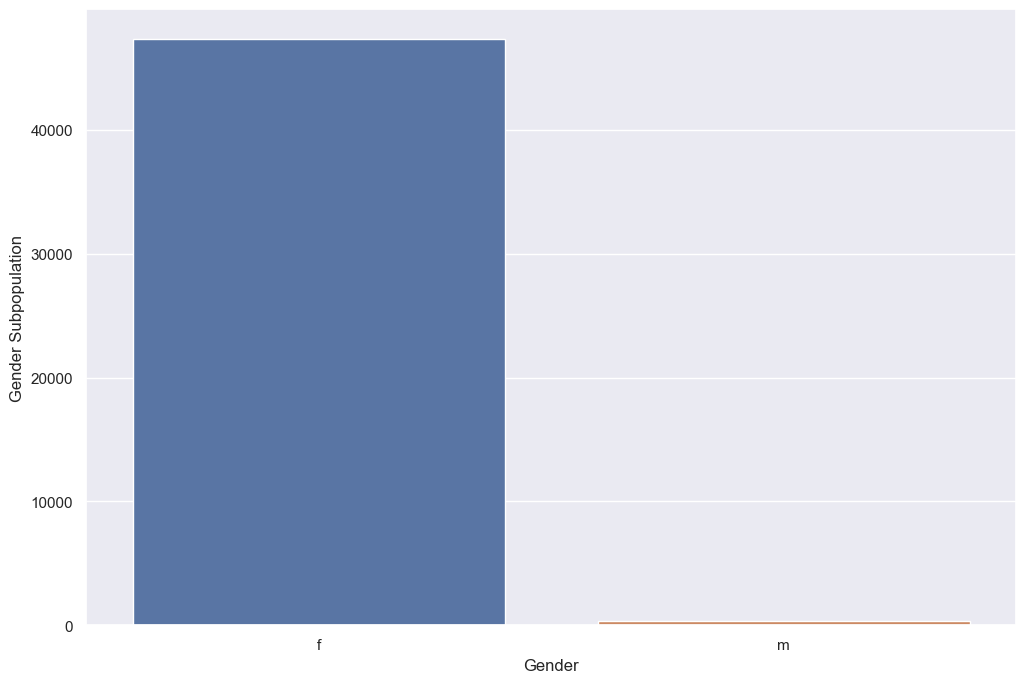

In [18]:
# Visualize target gender
plt.figure(figsize = (12, 8))

sns.countplot(data = data, x = "Target_Gender")

plt.xlabel("Gender")
plt.ylabel("Gender Subpopulation")

plt.show(); plt.close()

In [19]:
# Jewelry category analysis
data["Category"].value_counts()

Category
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0                    4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [20]:
data["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.9', '380.1', '357.49', '15.47', '135.33', '719.75',
       '93.01', '177.95', 'jewelry.stud', '102.1', '595.75', '469.56',
       '427.07', '53.62', '77.53', '1469.18', '355.27', '184.89',
       '154.66', '300.58', '83.73', '271.19', '3294.21', '278.04',
       '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22', '124.88',
       '89.73', '171.23', '136.93', '19.04', '158.77', '187.1', '151.92',
       '1845.89', '87.23', '248.58', '596.48', '208.88', '193.11',
       '169.84', '1447.68', '45.07', '136.85', '282.05', '61.51',
       '210.21', '137.12', '1

In [21]:
# Extract the actual categories 
categories = data["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]

In [22]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [23]:
# Pick out authentic data based on categories
real_categories = data.loc[data["Category"].isin(categories)]

In [24]:
real_categories

,Order_Datetime,Order_ID,Product_id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1.925510e+18,1.842210e+18,1,1.806830e+18,jewelry.pendant,1.0,54.66,1.515920e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1.925630e+18,1.835570e+18,1,1.806830e+18,jewelry.pendant,0.0,88.90,1.515920e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1.925740e+18,1.873940e+18,1,1.806830e+18,jewelry.necklace,0.0,417.67,1.515920e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1.925760e+18,1.835570e+18,1,1.806830e+18,jewelry.earring,1.0,102.27,1.515920e+18,NaN,red,gold,NaN
5,2018-12-02 22:09:34 UTC,1.925760e+18,1.600020e+18,1,1.806830e+18,jewelry.earring,0.0,150.55,1.515920e+18,NaN,red,gold,diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95900,2021-12-01 09:32:35 UTC,2.719010e+18,1.956660e+18,1,1.806830e+18,jewelry.ring,0.0,145.62,1.515920e+18,NaN,red,gold,NaN
95903,2021-12-01 09:37:28 UTC,2.719010e+18,1.956660e+18,1,1.806830e+18,jewelry.earring,0.0,301.23,1.515920e+18,NaN,red,gold,amethyst
95907,2021-12-01 09:52:06 UTC,2.719020e+18,1.956660e+18,1,1.806830e+18,jewelry.earring,1.0,630.00,1.515920e+18,f,white,gold,diamond
95908,2021-12-01 09:55:35 UTC,2.719020e+18,1.835570e+18,1,1.806830e+18,jewelry.earring,0.0,83.42,1.515920e+18,NaN,white,gold,fianit


In [25]:
#Percentage of missing values
100 * data.isnull().sum() / len(data)

Order_Datetime     0.000000
Order_ID           0.000000
Product_id         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [26]:
# Percentage of missing values
100 * real_categories.isnull().sum() / len(real_categories)

Order_Datetime     0.000000
Order_ID           0.000000
Product_id         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Color         2.656044
Main_Metal         0.110617
Main_Gem          24.232519
dtype: float64

In [27]:
real_categories.info

<bound method DataFrame.info of                 Order_Datetime      Order_ID    Product_id  SKU_Quantity  \
1      2018-12-02 13:53:42 UTC  1.925510e+18  1.842210e+18             1   
2      2018-12-02 17:44:02 UTC  1.925630e+18  1.835570e+18             1   
3      2018-12-02 21:30:19 UTC  1.925740e+18  1.873940e+18             1   
4      2018-12-02 22:09:34 UTC  1.925760e+18  1.835570e+18             1   
5      2018-12-02 22:09:34 UTC  1.925760e+18  1.600020e+18             1   
...                        ...           ...           ...           ...   
95900  2021-12-01 09:32:35 UTC  2.719010e+18  1.956660e+18             1   
95903  2021-12-01 09:37:28 UTC  2.719010e+18  1.956660e+18             1   
95907  2021-12-01 09:52:06 UTC  2.719020e+18  1.956660e+18             1   
95908  2021-12-01 09:55:35 UTC  2.719020e+18  1.835570e+18             1   
95909  2021-12-01 09:59:07 UTC  2.719020e+18  1.956660e+18             1   

        Category_ID          Category  Brand_ID  Price_

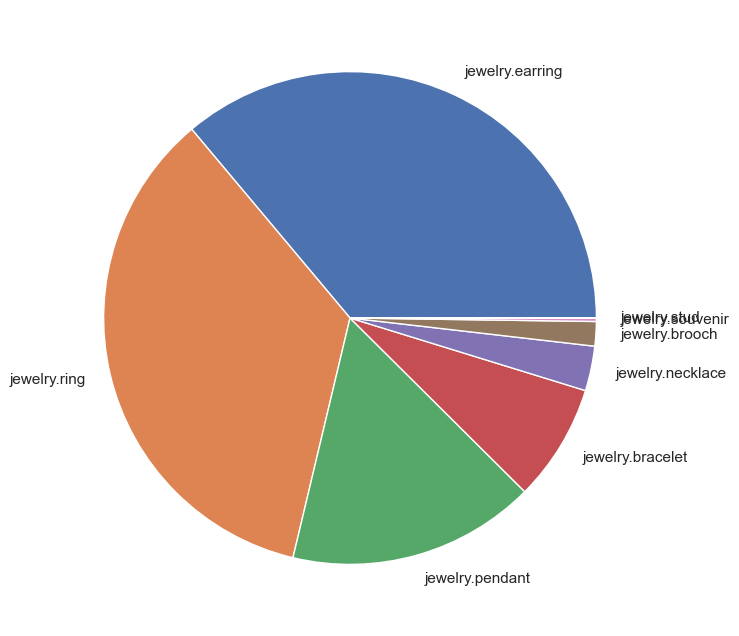

(None, None)

In [28]:
# Visualize jewelry categories
subdata = real_categories["Category"].value_counts()

jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize =(12, 8))

plt.pie(x = counts, labels = jewelry_categories)

plt.show(), plt.close()

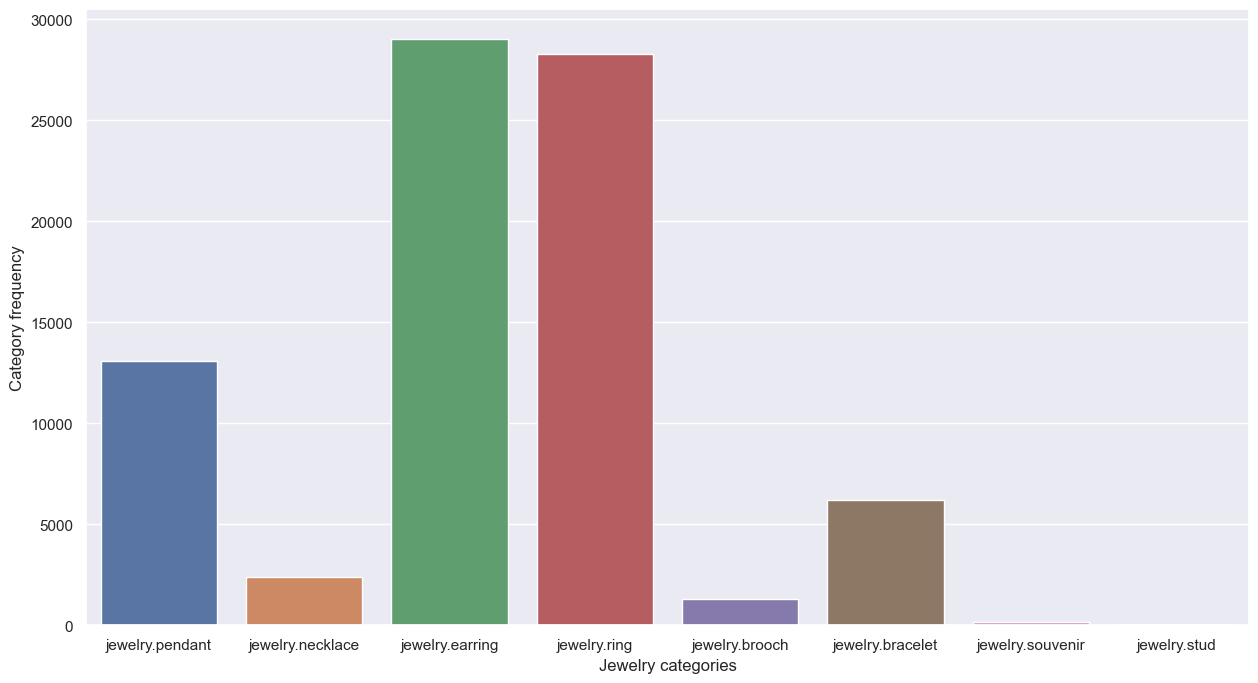

In [29]:
# Category count plot
plt.figure(figsize = (15, 8))

sns.countplot(data = real_categories, x = "Category")

plt.xlabel("Jewelry categories")
plt.ylabel("Category frequency")

plt.show(); plt.close()

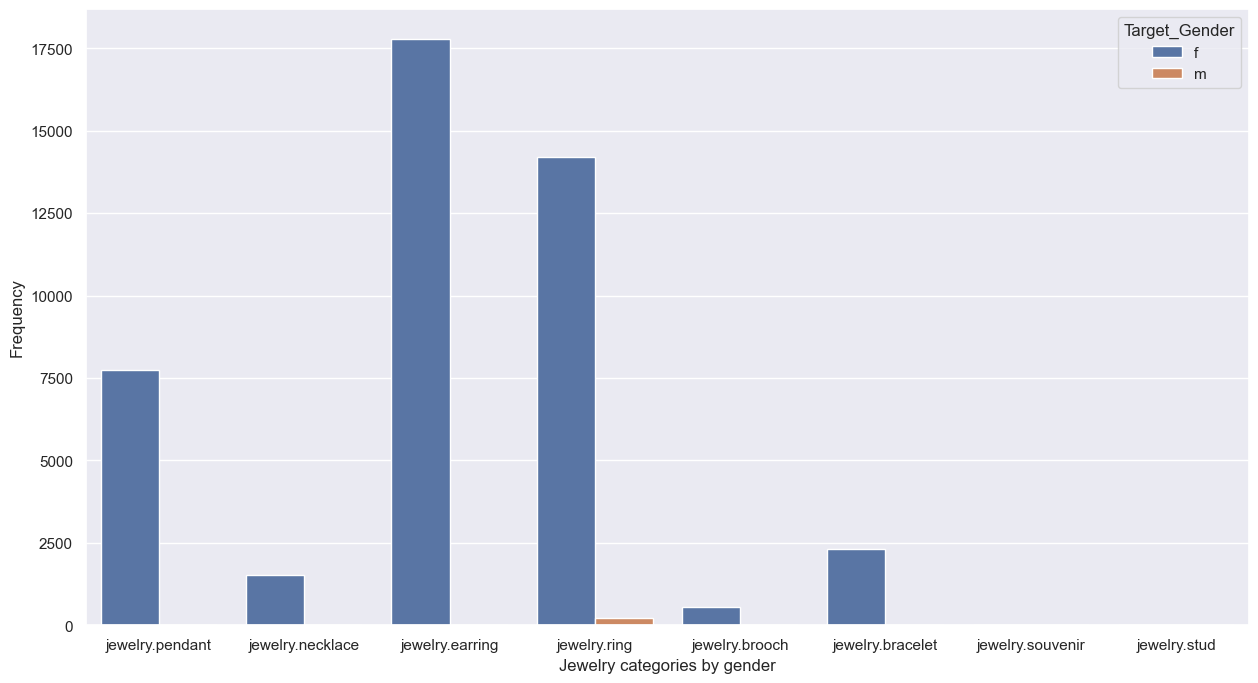

In [30]:
# Jewelry category by gender
plt.figure(figsize = (15, 8))

sns.countplot(data = real_categories, x = "Category", hue = "Target_Gender")

plt.xlabel("Jewelry categories by gender")
plt.ylabel("Frequency")

plt.show(); plt.close()

In [31]:
# Gender skew in orginal data
data["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

In [32]:
# Gender skew in orginal data
real_categories["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.994434
m    0.005566
Name: proportion, dtype: float64

In [33]:
real_categories.info

<bound method DataFrame.info of                 Order_Datetime      Order_ID    Product_id  SKU_Quantity  \
1      2018-12-02 13:53:42 UTC  1.925510e+18  1.842210e+18             1   
2      2018-12-02 17:44:02 UTC  1.925630e+18  1.835570e+18             1   
3      2018-12-02 21:30:19 UTC  1.925740e+18  1.873940e+18             1   
4      2018-12-02 22:09:34 UTC  1.925760e+18  1.835570e+18             1   
5      2018-12-02 22:09:34 UTC  1.925760e+18  1.600020e+18             1   
...                        ...           ...           ...           ...   
95900  2021-12-01 09:32:35 UTC  2.719010e+18  1.956660e+18             1   
95903  2021-12-01 09:37:28 UTC  2.719010e+18  1.956660e+18             1   
95907  2021-12-01 09:52:06 UTC  2.719020e+18  1.956660e+18             1   
95908  2021-12-01 09:55:35 UTC  2.719020e+18  1.835570e+18             1   
95909  2021-12-01 09:59:07 UTC  2.719020e+18  1.956660e+18             1   

        Category_ID          Category  Brand_ID  Price_

In [34]:
real_categories.describe

<bound method NDFrame.describe of                 Order_Datetime      Order_ID    Product_id  SKU_Quantity  \
1      2018-12-02 13:53:42 UTC  1.925510e+18  1.842210e+18             1   
2      2018-12-02 17:44:02 UTC  1.925630e+18  1.835570e+18             1   
3      2018-12-02 21:30:19 UTC  1.925740e+18  1.873940e+18             1   
4      2018-12-02 22:09:34 UTC  1.925760e+18  1.835570e+18             1   
5      2018-12-02 22:09:34 UTC  1.925760e+18  1.600020e+18             1   
...                        ...           ...           ...           ...   
95900  2021-12-01 09:32:35 UTC  2.719010e+18  1.956660e+18             1   
95903  2021-12-01 09:37:28 UTC  2.719010e+18  1.956660e+18             1   
95907  2021-12-01 09:52:06 UTC  2.719020e+18  1.956660e+18             1   
95908  2021-12-01 09:55:35 UTC  2.719020e+18  1.835570e+18             1   
95909  2021-12-01 09:59:07 UTC  2.719020e+18  1.956660e+18             1   

        Category_ID          Category  Brand_ID  Pric

In [35]:
real_categories.head()

,Order_Datetime,Order_ID,Product_id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1.925510e+18,1.842210e+18,1,1.806830e+18,jewelry.pendant,1.0,54.66,1.515920e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1.925630e+18,1.835570e+18,1,1.806830e+18,jewelry.pendant,0.0,88.90,1.515920e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1.925740e+18,1.873940e+18,1,1.806830e+18,jewelry.necklace,0.0,417.67,1.515920e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1.925760e+18,1.835570e+18,1,1.806830e+18,jewelry.earring,1.0,102.27,1.515920e+18,NaN,red,gold,NaN
5,2018-12-02 22:09:34 UTC,1.925760e+18,1.600020e+18,1,1.806830e+18,jewelry.earring,0.0,150.55,1.515920e+18,NaN,red,gold,diamond


In [36]:
# Encoded Main_Metal
encoded, category_code = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded
#real_categories = real_categories.assign(Main_Metal = encoded)

In [37]:
# Encoded Jewelry Categories
encoded, categories_code = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded
#real_categories = real_categories.assign(Category = encoded)

# Using the assign instead of .loc because i modified the DataFrame
# real_categories = real_categories.loc[:, ["Category"]].assign(Category=encoded)

In [38]:
# Encode jewelry gender
encoded, category_code = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded
#real_categories = real_categories.assign(Target_Gender=encoded)
#real_categories = real_categories.loc[:, ["Target_Gender"]].assign(Target_Gender=encoded)

In [39]:
# Encode Main_Gem
encoded, category_code = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded
#real_categories = real_categories.loc[:, ["Main_Gem"]].assign(Main_Gem=encoded)

In [40]:
# Encode color
encoded, category_code = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:,"Main_Color"] = encoded
#real_categories = real_categories.loc[:, ["Main_Color"]].assign(Main_Color=encoded)

Feature correlation

It would make some sense to observe the features for colinearity. As most of the features in the dataset are categorical, the Spearman Rank correlation coefficient will be utilized.

In [41]:
correlations = real_categories.drop(labels = ["Order_Datetime", "Order_ID", "User_ID", "Product_id"], axis = 1).corr(method = "spearman", numeric_only=True)

In [42]:
real_categories

,Order_Datetime,Order_ID,Product_id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1.925510e+18,1.842210e+18,1,1.806830e+18,0,1.0,54.66,1.515920e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1.925630e+18,1.835570e+18,1,1.806830e+18,0,0.0,88.90,1.515920e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1.925740e+18,1.873940e+18,1,1.806830e+18,1,0.0,417.67,1.515920e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1.925760e+18,1.835570e+18,1,1.806830e+18,2,1.0,102.27,1.515920e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1.925760e+18,1.600020e+18,1,1.806830e+18,2,0.0,150.55,1.515920e+18,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95900,2021-12-01 09:32:35 UTC,2.719010e+18,1.956660e+18,1,1.806830e+18,3,0.0,145.62,1.515920e+18,-1,1,0,-1
95903,2021-12-01 09:37:28 UTC,2.719010e+18,1.956660e+18,1,1.806830e+18,2,0.0,301.23,1.515920e+18,-1,1,0,2
95907,2021-12-01 09:52:06 UTC,2.719020e+18,1.956660e+18,1,1.806830e+18,2,1.0,630.00,1.515920e+18,0,0,0,1
95908,2021-12-01 09:55:35 UTC,2.719020e+18,1.835570e+18,1,1.806830e+18,2,0.0,83.42,1.515920e+18,-1,0,0,3


In [43]:
correlations

,SKU_Quantity,Category_ID,Brand_ID,Price_USD
SKU_Quantity,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.012950,0.027919
Brand_ID,NaN,-0.012950,1.000000,-0.018428
Price_USD,NaN,0.027919,-0.018428,1.000000


In [44]:
# Feature correlation 
correlations = real_categories.drop(["Order_Datetime", "User_ID", "Order_ID"], axis=1).corr("spearman")
correlations = real_categories.drop(labels = ["Order_Datetime", "Order_ID", "User_ID", "Product_id"], axis = 1).corr(method = "spearman")

In [45]:
correlations

,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,0.022894,-0.012950,0.027919,0.040773,0.051492,0.185724,0.035895
Category,NaN,0.022894,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,-0.012950,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,0.027919,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.040773,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.051492,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,NaN,0.185724,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,NaN,0.035895,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


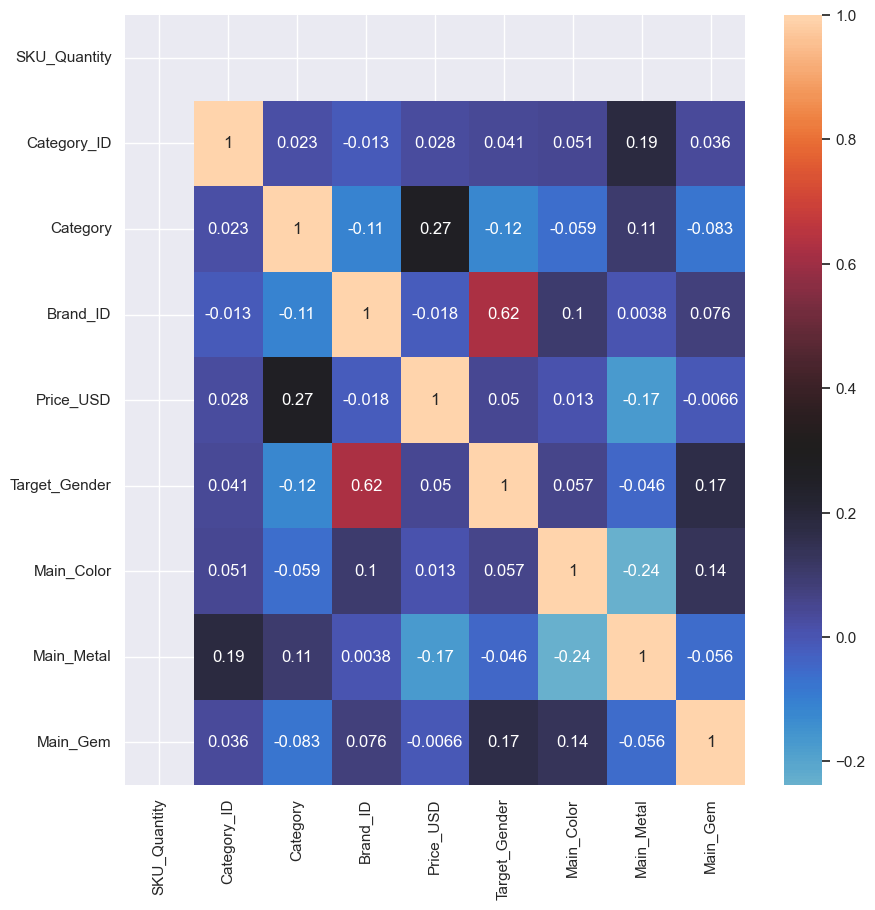

In [46]:
# Correlation Heatmap
plt.figure(figsize =(10, 10))

sns.heatmap(correlations, annot = True, center = .3)

plt.show(); plt.close()

In [47]:
# Set correlation limits
upper = 1
lower = .2

In [48]:
correlated_columns = {
    column: correlations[(correlations[column] > lower) & (upper > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [49]:
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

From the correlation analysis above, it is obvious that most of the features exhibit low correlations with one another and with the target variable itself. This may be taken as a mix of good and bad news.

The good news is that there is little colinearity among the features. This is good for feature independence, which might imply that each variable encodes information that might be relatively orthogonal to the information encoded within other variables. The bad news is, that any model trained in these features might have a difficult time learning anything from the data, as the target variable has little correlation with the independent variables.

# 2.2 Data Implications

### Implied by our findings above, we can say the following:
    1. Missing Values: There are a lot of missing values in the dataset. This may be fixed either by value imputation or missingness encoding.
    2. Data corruption: Some variables, (eg. jewelry_category) contain corrupt values.
    3. Rare values: Some features have some values that occur rarely. A prime instance of this is the Target_Gender column, where the male gender is rarely represented. Sometimes, these are data issues. Other times, like in this case, this can be a true reflection of the distribution from which the data is generated.
    4. Low cardinality or feature invarience: The SKU_Quantity feature only has one unique value (eg.1). This feature provides no new information.
    5. Target skew. The target variable is highly right-skewed. This can present an issue during training. 
    6. Correlation: For the most part, the feautures exhibits low multicollinearity, hence ensuring feature independence. However, the target variable exhibits a low correlation with the independent variables.

In [50]:
# Columns to eliminate
columns_to_eliminate =[
    "SKU_Quantity",
    "Order_ID",
    "Product_id",
    "User_ID",
    "Category_ID"
]    

In [51]:
# Eliminate unused features
data.drop(labels = columns_to_eliminate, axis = 1, inplace = True)

In [52]:
data.shape

(95910, 8)

In [53]:
# Eliminate unused features
data.drop(labels = ["Order_Datetime"], axis = 1, inplace = True)

In [54]:
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [55]:
# Eliminate unrealistic category
data = data.loc[data["Category"].isin(categories), :]

In [56]:
data.shape

(80458, 7)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# Separate features from labels
x,y = data.drop(labels = ["Price_USD"], axis = 1), data["Price_USD"]

In [59]:
# Create test and train splits
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [60]:
from sklearn.model_selection import train_test_split

X, y = data.drop(labels = ["Price_USD"], axis = 1), data["Price_USD"]  # Load your data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
x_test.head

<bound method NDFrame.head of                Category  Brand_ID Target_Gender Main_Color Main_Metal  \
95793      jewelry.ring       1.0           NaN        red       gold   
79744   jewelry.earring       1.0             f        red       gold   
81344   jewelry.earring       0.0             f        red       gold   
26084  jewelry.necklace       0.0           NaN     yellow       gold   
21106   jewelry.pendant       NaN             f        red       gold   
...                 ...       ...           ...        ...        ...   
55261      jewelry.ring       0.0           NaN      white       gold   
13071      jewelry.ring       0.0           NaN        red       gold   
27781   jewelry.earring       0.0           NaN      white       gold   
3768       jewelry.ring       0.0           NaN        red       gold   
67612   jewelry.earring       1.0             f        red       gold   

       Main_Gem  
95793   diamond  
79744       NaN  
81344    quartz  
26084     topaz  
211

In [62]:
x_train.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
36536,jewelry.earring,0.0,NaN,red,gold,diamond
37432,jewelry.necklace,1.0,f,red,gold,pearl
53358,jewelry.bracelet,1.0,NaN,red,gold,NaN
92003,jewelry.pendant,1.0,f,red,gold,fianit
21165,jewelry.bracelet,1.0,f,red,gold,NaN


In [63]:
y_train.head()

36536    164.25
37432    232.74
53358    275.38
92003     40.96
21165    498.49
Name: Price_USD, dtype: float64

In [64]:
x_test.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
95793,jewelry.ring,1.0,NaN,red,gold,diamond
79744,jewelry.earring,1.0,f,red,gold,NaN
81344,jewelry.earring,0.0,f,red,gold,quartz
26084,jewelry.necklace,0.0,NaN,yellow,gold,topaz
21106,jewelry.pendant,NaN,f,red,gold,topaz


## 04. Data Modelling

1. Linear Regression.
2. Extremely Random Forest (ExtraTrees).
3. Adaptive Boosting(AdaBoost). and 
4. Catboost.

1. Encode categorical features (if required)
2. Account for target skew.
3. Fix missing values

In [65]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [66]:
from sklearn.pipeline import Pipeline

In [67]:
def generate_pipeline(model, column_indices, categorical_indices, fill_missing = True, one_hot = True, label_encode = False):
    # Fix missing values
    first_transformer = ColumnTransformer(
        transformers = [
            ("imputer", SimpleImputer(strategy = "most_frequent"), column_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )
   
    # One hot encode
    second_transformer = ColumnTransformer(
        transformers = [
            ("one_hot", OneHotEncoder(), categorical_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    # Label encode
    third_transformer = ColumnTransformer(
        transformers = [
            ("ordinal", OrdinalEncoder(), categorical_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )
        
    steps = []
            
    if fill_missing:
        steps.append(("first", first_transformer))
    
    if label_encode:
        steps.append(("third", third_transformer))
    
    if one_hot:
        steps.append(("second", second_transformer))
            
    steps.append(("model", model))
    
    model_pipe = Pipeline(steps = steps)
    
    return model_pipe

In [68]:
x.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,jewelry.pendant,1.0,f,white,gold,sapphire
2,jewelry.pendant,0.0,f,red,gold,diamond
3,jewelry.necklace,0.0,NaN,red,gold,amethyst
4,jewelry.earring,1.0,NaN,red,gold,NaN
5,jewelry.earring,0.0,NaN,red,gold,diamond


In [69]:
# Generate indices
columns = x.columns.tolist()

column_indices = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ["Brand_ID"]]
categorical_indices = [columns.index(c) for c in categorical_features]

In [70]:
categorical_indices

[0, 2, 3, 4, 5]

In [71]:
# CarBoost pipeline
cat_pipe = generate_pipeline(
    CatBoostRegressor(loss_function = "RMSE", iterations = 10000, learning_rate = 0.1, one_hot_max_size = 2),
    column_indices,
    categorical_indices,
    fill_missing = False, one_hot = False, label_encode = True
)

In [72]:
# LR pipeline
lin_pipe = generate_pipeline(
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [73]:
# AdaBoost pipeline
ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss = "exponential", n_estimators = 1000, learning_rate = .01),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [74]:
# ExtraTrees pipeline
extra_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion = "friedman_mse", n_estimators = 1000, bootstrap = True),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [75]:
from sklearn.preprocessing import PowerTransformer

In [76]:
# Transform Targets
cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer = PowerTransformer(method = 'box-cox'))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer = PowerTransformer(method = 'box-cox'))
lin_pipe = TransformedTargetRegressor(regressor = lin_pipe, transformer = PowerTransformer(method = 'box-cox'))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method = 'box-cox'))

In [77]:
# Fit CatBoost
cat_pipe.fit(x_train, y_train)

0:	learn: 0.9628018	total: 155ms	remaining: 25m 53s
1:	learn: 0.9247244	total: 165ms	remaining: 13m 44s
2:	learn: 0.8979042	total: 173ms	remaining: 9m 37s
3:	learn: 0.8703474	total: 181ms	remaining: 7m 33s
4:	learn: 0.8506580	total: 189ms	remaining: 6m 18s
5:	learn: 0.8295803	total: 196ms	remaining: 5m 26s
6:	learn: 0.8149396	total: 203ms	remaining: 4m 49s
7:	learn: 0.7991633	total: 210ms	remaining: 4m 22s
8:	learn: 0.7889715	total: 218ms	remaining: 4m 1s
9:	learn: 0.7795567	total: 226ms	remaining: 3m 45s
10:	learn: 0.7694987	total: 234ms	remaining: 3m 32s
11:	learn: 0.7617250	total: 240ms	remaining: 3m 20s
12:	learn: 0.7556391	total: 247ms	remaining: 3m 9s
13:	learn: 0.7502432	total: 255ms	remaining: 3m 1s
14:	learn: 0.7454024	total: 263ms	remaining: 2m 54s
15:	learn: 0.7384501	total: 270ms	remaining: 2m 48s
16:	learn: 0.7344105	total: 276ms	remaining: 2m 42s
17:	learn: 0.7295420	total: 283ms	remaining: 2m 37s
18:	learn: 0.7251926	total: 289ms	remaining: 2m 31s
19:	learn: 0.7204818	to

170:	learn: 0.6431904	total: 1.54s	remaining: 1m 28s
171:	learn: 0.6431124	total: 1.54s	remaining: 1m 28s
172:	learn: 0.6430742	total: 1.55s	remaining: 1m 28s
173:	learn: 0.6429951	total: 1.56s	remaining: 1m 28s
174:	learn: 0.6428360	total: 1.58s	remaining: 1m 28s
175:	learn: 0.6427280	total: 1.59s	remaining: 1m 28s
176:	learn: 0.6426742	total: 1.6s	remaining: 1m 28s
177:	learn: 0.6425250	total: 1.6s	remaining: 1m 28s
178:	learn: 0.6423498	total: 1.61s	remaining: 1m 28s
179:	learn: 0.6422969	total: 1.61s	remaining: 1m 28s
180:	learn: 0.6422511	total: 1.62s	remaining: 1m 27s
181:	learn: 0.6420909	total: 1.63s	remaining: 1m 27s
182:	learn: 0.6419825	total: 1.63s	remaining: 1m 27s
183:	learn: 0.6418945	total: 1.64s	remaining: 1m 27s
184:	learn: 0.6416770	total: 1.65s	remaining: 1m 27s
185:	learn: 0.6415974	total: 1.65s	remaining: 1m 27s
186:	learn: 0.6414772	total: 1.66s	remaining: 1m 26s
187:	learn: 0.6414415	total: 1.66s	remaining: 1m 26s
188:	learn: 0.6413724	total: 1.67s	remaining: 1m

341:	learn: 0.6300365	total: 2.94s	remaining: 1m 23s
342:	learn: 0.6299972	total: 2.95s	remaining: 1m 23s
343:	learn: 0.6299971	total: 2.96s	remaining: 1m 23s
344:	learn: 0.6299904	total: 2.97s	remaining: 1m 23s
345:	learn: 0.6299542	total: 2.98s	remaining: 1m 23s
346:	learn: 0.6299209	total: 2.98s	remaining: 1m 23s
347:	learn: 0.6298892	total: 2.99s	remaining: 1m 23s
348:	learn: 0.6298590	total: 3s	remaining: 1m 23s
349:	learn: 0.6298213	total: 3.01s	remaining: 1m 23s
350:	learn: 0.6297962	total: 3.02s	remaining: 1m 23s
351:	learn: 0.6297843	total: 3.03s	remaining: 1m 23s
352:	learn: 0.6297711	total: 3.04s	remaining: 1m 22s
353:	learn: 0.6297206	total: 3.05s	remaining: 1m 23s
354:	learn: 0.6297149	total: 3.05s	remaining: 1m 22s
355:	learn: 0.6297010	total: 3.06s	remaining: 1m 23s
356:	learn: 0.6296851	total: 3.07s	remaining: 1m 23s
357:	learn: 0.6296053	total: 3.08s	remaining: 1m 22s
358:	learn: 0.6295644	total: 3.09s	remaining: 1m 22s
359:	learn: 0.6295593	total: 3.1s	remaining: 1m 2

515:	learn: 0.6247021	total: 4.38s	remaining: 1m 20s
516:	learn: 0.6246676	total: 4.39s	remaining: 1m 20s
517:	learn: 0.6246599	total: 4.39s	remaining: 1m 20s
518:	learn: 0.6246288	total: 4.4s	remaining: 1m 20s
519:	learn: 0.6245494	total: 4.41s	remaining: 1m 20s
520:	learn: 0.6245299	total: 4.42s	remaining: 1m 20s
521:	learn: 0.6245172	total: 4.43s	remaining: 1m 20s
522:	learn: 0.6244731	total: 4.44s	remaining: 1m 20s
523:	learn: 0.6244543	total: 4.44s	remaining: 1m 20s
524:	learn: 0.6244301	total: 4.45s	remaining: 1m 20s
525:	learn: 0.6244266	total: 4.46s	remaining: 1m 20s
526:	learn: 0.6243933	total: 4.47s	remaining: 1m 20s
527:	learn: 0.6243361	total: 4.47s	remaining: 1m 20s
528:	learn: 0.6243269	total: 4.48s	remaining: 1m 20s
529:	learn: 0.6243108	total: 4.49s	remaining: 1m 20s
530:	learn: 0.6242924	total: 4.49s	remaining: 1m 20s
531:	learn: 0.6242841	total: 4.5s	remaining: 1m 20s
532:	learn: 0.6242612	total: 4.51s	remaining: 1m 20s
533:	learn: 0.6242454	total: 4.51s	remaining: 1m

691:	learn: 0.6217190	total: 5.57s	remaining: 1m 14s
692:	learn: 0.6216960	total: 5.58s	remaining: 1m 14s
693:	learn: 0.6216860	total: 5.59s	remaining: 1m 14s
694:	learn: 0.6216778	total: 5.6s	remaining: 1m 14s
695:	learn: 0.6216442	total: 5.6s	remaining: 1m 14s
696:	learn: 0.6216340	total: 5.61s	remaining: 1m 14s
697:	learn: 0.6216264	total: 5.62s	remaining: 1m 14s
698:	learn: 0.6216095	total: 5.62s	remaining: 1m 14s
699:	learn: 0.6215993	total: 5.63s	remaining: 1m 14s
700:	learn: 0.6215969	total: 5.64s	remaining: 1m 14s
701:	learn: 0.6215940	total: 5.64s	remaining: 1m 14s
702:	learn: 0.6215889	total: 5.65s	remaining: 1m 14s
703:	learn: 0.6215708	total: 5.66s	remaining: 1m 14s
704:	learn: 0.6215483	total: 5.66s	remaining: 1m 14s
705:	learn: 0.6215405	total: 5.67s	remaining: 1m 14s
706:	learn: 0.6215276	total: 5.67s	remaining: 1m 14s
707:	learn: 0.6215230	total: 5.68s	remaining: 1m 14s
708:	learn: 0.6215197	total: 5.69s	remaining: 1m 14s
709:	learn: 0.6215129	total: 5.69s	remaining: 1m

877:	learn: 0.6201505	total: 6.77s	remaining: 1m 10s
878:	learn: 0.6201494	total: 6.77s	remaining: 1m 10s
879:	learn: 0.6201329	total: 6.78s	remaining: 1m 10s
880:	learn: 0.6201291	total: 6.79s	remaining: 1m 10s
881:	learn: 0.6201274	total: 6.79s	remaining: 1m 10s
882:	learn: 0.6201221	total: 6.8s	remaining: 1m 10s
883:	learn: 0.6201208	total: 6.81s	remaining: 1m 10s
884:	learn: 0.6201081	total: 6.81s	remaining: 1m 10s
885:	learn: 0.6201069	total: 6.82s	remaining: 1m 10s
886:	learn: 0.6201040	total: 6.83s	remaining: 1m 10s
887:	learn: 0.6201001	total: 6.83s	remaining: 1m 10s
888:	learn: 0.6200929	total: 6.84s	remaining: 1m 10s
889:	learn: 0.6200879	total: 6.85s	remaining: 1m 10s
890:	learn: 0.6200879	total: 6.85s	remaining: 1m 10s
891:	learn: 0.6200828	total: 6.86s	remaining: 1m 10s
892:	learn: 0.6200821	total: 6.86s	remaining: 1m 10s
893:	learn: 0.6200741	total: 6.87s	remaining: 1m 9s
894:	learn: 0.6200655	total: 6.88s	remaining: 1m 9s
895:	learn: 0.6200633	total: 6.88s	remaining: 1m 

1047:	learn: 0.6192564	total: 7.95s	remaining: 1m 7s
1048:	learn: 0.6192549	total: 7.95s	remaining: 1m 7s
1049:	learn: 0.6192528	total: 7.96s	remaining: 1m 7s
1050:	learn: 0.6192472	total: 7.97s	remaining: 1m 7s
1051:	learn: 0.6192433	total: 7.97s	remaining: 1m 7s
1052:	learn: 0.6192420	total: 7.98s	remaining: 1m 7s
1053:	learn: 0.6192409	total: 7.99s	remaining: 1m 7s
1054:	learn: 0.6192279	total: 7.99s	remaining: 1m 7s
1055:	learn: 0.6192198	total: 8s	remaining: 1m 7s
1056:	learn: 0.6192153	total: 8.01s	remaining: 1m 7s
1057:	learn: 0.6192153	total: 8.01s	remaining: 1m 7s
1058:	learn: 0.6192117	total: 8.02s	remaining: 1m 7s
1059:	learn: 0.6192025	total: 8.02s	remaining: 1m 7s
1060:	learn: 0.6191971	total: 8.03s	remaining: 1m 7s
1061:	learn: 0.6191887	total: 8.04s	remaining: 1m 7s
1062:	learn: 0.6191810	total: 8.04s	remaining: 1m 7s
1063:	learn: 0.6191810	total: 8.05s	remaining: 1m 7s
1064:	learn: 0.6191717	total: 8.05s	remaining: 1m 7s
1065:	learn: 0.6191696	total: 8.06s	remaining: 1m

1235:	learn: 0.6184911	total: 9.13s	remaining: 1m 4s
1236:	learn: 0.6184892	total: 9.14s	remaining: 1m 4s
1237:	learn: 0.6184886	total: 9.15s	remaining: 1m 4s
1238:	learn: 0.6184822	total: 9.15s	remaining: 1m 4s
1239:	learn: 0.6184802	total: 9.16s	remaining: 1m 4s
1240:	learn: 0.6184749	total: 9.17s	remaining: 1m 4s
1241:	learn: 0.6184742	total: 9.17s	remaining: 1m 4s
1242:	learn: 0.6184727	total: 9.18s	remaining: 1m 4s
1243:	learn: 0.6184673	total: 9.19s	remaining: 1m 4s
1244:	learn: 0.6184671	total: 9.19s	remaining: 1m 4s
1245:	learn: 0.6184668	total: 9.2s	remaining: 1m 4s
1246:	learn: 0.6184660	total: 9.2s	remaining: 1m 4s
1247:	learn: 0.6184627	total: 9.21s	remaining: 1m 4s
1248:	learn: 0.6184616	total: 9.21s	remaining: 1m 4s
1249:	learn: 0.6184564	total: 9.22s	remaining: 1m 4s
1250:	learn: 0.6184554	total: 9.23s	remaining: 1m 4s
1251:	learn: 0.6184542	total: 9.23s	remaining: 1m 4s
1252:	learn: 0.6184469	total: 9.24s	remaining: 1m 4s
1253:	learn: 0.6184390	total: 9.24s	remaining: 1

1397:	learn: 0.6180396	total: 10.1s	remaining: 1m 2s
1398:	learn: 0.6180396	total: 10.1s	remaining: 1m 2s
1399:	learn: 0.6180381	total: 10.1s	remaining: 1m 2s
1400:	learn: 0.6180372	total: 10.1s	remaining: 1m 2s
1401:	learn: 0.6180356	total: 10.1s	remaining: 1m 2s
1402:	learn: 0.6180293	total: 10.2s	remaining: 1m 2s
1403:	learn: 0.6180276	total: 10.2s	remaining: 1m 2s
1404:	learn: 0.6180273	total: 10.2s	remaining: 1m 2s
1405:	learn: 0.6180220	total: 10.2s	remaining: 1m 2s
1406:	learn: 0.6180204	total: 10.2s	remaining: 1m 2s
1407:	learn: 0.6180191	total: 10.2s	remaining: 1m 2s
1408:	learn: 0.6180143	total: 10.2s	remaining: 1m 2s
1409:	learn: 0.6179910	total: 10.2s	remaining: 1m 2s
1410:	learn: 0.6179836	total: 10.2s	remaining: 1m 2s
1411:	learn: 0.6179766	total: 10.2s	remaining: 1m 2s
1412:	learn: 0.6179760	total: 10.2s	remaining: 1m 2s
1413:	learn: 0.6179750	total: 10.2s	remaining: 1m 2s
1414:	learn: 0.6179723	total: 10.2s	remaining: 1m 2s
1415:	learn: 0.6179718	total: 10.2s	remaining:

1584:	learn: 0.6175454	total: 11.3s	remaining: 60s
1585:	learn: 0.6175435	total: 11.3s	remaining: 60s
1586:	learn: 0.6175411	total: 11.3s	remaining: 60s
1587:	learn: 0.6175410	total: 11.3s	remaining: 59.9s
1588:	learn: 0.6175341	total: 11.3s	remaining: 59.9s
1589:	learn: 0.6175292	total: 11.3s	remaining: 59.9s
1590:	learn: 0.6175289	total: 11.3s	remaining: 59.9s
1591:	learn: 0.6175254	total: 11.3s	remaining: 59.9s
1592:	learn: 0.6175253	total: 11.3s	remaining: 59.9s
1593:	learn: 0.6175253	total: 11.3s	remaining: 59.8s
1594:	learn: 0.6175181	total: 11.4s	remaining: 59.8s
1595:	learn: 0.6175175	total: 11.4s	remaining: 59.8s
1596:	learn: 0.6175150	total: 11.4s	remaining: 59.8s
1597:	learn: 0.6175143	total: 11.4s	remaining: 59.8s
1598:	learn: 0.6175122	total: 11.4s	remaining: 59.8s
1599:	learn: 0.6175122	total: 11.4s	remaining: 59.8s
1600:	learn: 0.6175108	total: 11.4s	remaining: 59.8s
1601:	learn: 0.6175104	total: 11.4s	remaining: 59.7s
1602:	learn: 0.6174938	total: 11.4s	remaining: 59.7s

1746:	learn: 0.6172484	total: 12.3s	remaining: 58s
1747:	learn: 0.6172480	total: 12.3s	remaining: 58s
1748:	learn: 0.6172475	total: 12.3s	remaining: 58s
1749:	learn: 0.6172467	total: 12.3s	remaining: 58s
1750:	learn: 0.6172425	total: 12.3s	remaining: 58s
1751:	learn: 0.6172387	total: 12.3s	remaining: 58s
1752:	learn: 0.6172387	total: 12.3s	remaining: 57.9s
1753:	learn: 0.6172374	total: 12.3s	remaining: 57.9s
1754:	learn: 0.6172342	total: 12.3s	remaining: 57.9s
1755:	learn: 0.6172298	total: 12.3s	remaining: 57.9s
1756:	learn: 0.6172282	total: 12.3s	remaining: 57.9s
1757:	learn: 0.6172200	total: 12.3s	remaining: 57.9s
1758:	learn: 0.6172193	total: 12.3s	remaining: 57.9s
1759:	learn: 0.6172183	total: 12.4s	remaining: 57.8s
1760:	learn: 0.6172183	total: 12.4s	remaining: 57.8s
1761:	learn: 0.6172076	total: 12.4s	remaining: 57.8s
1762:	learn: 0.6172076	total: 12.4s	remaining: 57.8s
1763:	learn: 0.6172049	total: 12.4s	remaining: 57.8s
1764:	learn: 0.6172041	total: 12.4s	remaining: 57.8s
1765:

1914:	learn: 0.6169574	total: 13.3s	remaining: 56s
1915:	learn: 0.6169548	total: 13.3s	remaining: 56s
1916:	learn: 0.6169532	total: 13.3s	remaining: 56s
1917:	learn: 0.6169504	total: 13.3s	remaining: 56s
1918:	learn: 0.6169481	total: 13.3s	remaining: 56s
1919:	learn: 0.6169476	total: 13.3s	remaining: 56s
1920:	learn: 0.6169455	total: 13.3s	remaining: 56s
1921:	learn: 0.6169385	total: 13.3s	remaining: 56s
1922:	learn: 0.6169384	total: 13.3s	remaining: 55.9s
1923:	learn: 0.6169379	total: 13.3s	remaining: 55.9s
1924:	learn: 0.6169363	total: 13.3s	remaining: 55.9s
1925:	learn: 0.6169328	total: 13.3s	remaining: 55.9s
1926:	learn: 0.6169324	total: 13.3s	remaining: 55.9s
1927:	learn: 0.6169323	total: 13.3s	remaining: 55.9s
1928:	learn: 0.6169319	total: 13.4s	remaining: 55.9s
1929:	learn: 0.6169292	total: 13.4s	remaining: 55.9s
1930:	learn: 0.6169280	total: 13.4s	remaining: 55.9s
1931:	learn: 0.6169259	total: 13.4s	remaining: 55.8s
1932:	learn: 0.6169259	total: 13.4s	remaining: 55.8s
1933:	lea

2081:	learn: 0.6167440	total: 14.3s	remaining: 54.2s
2082:	learn: 0.6167434	total: 14.3s	remaining: 54.2s
2083:	learn: 0.6167424	total: 14.3s	remaining: 54.2s
2084:	learn: 0.6167417	total: 14.3s	remaining: 54.2s
2085:	learn: 0.6167364	total: 14.3s	remaining: 54.2s
2086:	learn: 0.6167357	total: 14.3s	remaining: 54.2s
2087:	learn: 0.6167357	total: 14.3s	remaining: 54.2s
2088:	learn: 0.6167355	total: 14.3s	remaining: 54.1s
2089:	learn: 0.6167345	total: 14.3s	remaining: 54.1s
2090:	learn: 0.6167336	total: 14.3s	remaining: 54.1s
2091:	learn: 0.6167310	total: 14.3s	remaining: 54.1s
2092:	learn: 0.6167306	total: 14.3s	remaining: 54.1s
2093:	learn: 0.6167295	total: 14.3s	remaining: 54.1s
2094:	learn: 0.6167294	total: 14.3s	remaining: 54.1s
2095:	learn: 0.6167288	total: 14.3s	remaining: 54.1s
2096:	learn: 0.6167277	total: 14.3s	remaining: 54.1s
2097:	learn: 0.6167275	total: 14.4s	remaining: 54.1s
2098:	learn: 0.6167267	total: 14.4s	remaining: 54s
2099:	learn: 0.6167262	total: 14.4s	remaining: 5

2244:	learn: 0.6165966	total: 15.2s	remaining: 52.6s
2245:	learn: 0.6165959	total: 15.2s	remaining: 52.6s
2246:	learn: 0.6165959	total: 15.2s	remaining: 52.6s
2247:	learn: 0.6165940	total: 15.3s	remaining: 52.6s
2248:	learn: 0.6165937	total: 15.3s	remaining: 52.6s
2249:	learn: 0.6165928	total: 15.3s	remaining: 52.6s
2250:	learn: 0.6165920	total: 15.3s	remaining: 52.6s
2251:	learn: 0.6165897	total: 15.3s	remaining: 52.6s
2252:	learn: 0.6165896	total: 15.3s	remaining: 52.6s
2253:	learn: 0.6165894	total: 15.3s	remaining: 52.6s
2254:	learn: 0.6165885	total: 15.3s	remaining: 52.5s
2255:	learn: 0.6165885	total: 15.3s	remaining: 52.5s
2256:	learn: 0.6165874	total: 15.3s	remaining: 52.5s
2257:	learn: 0.6165873	total: 15.3s	remaining: 52.5s
2258:	learn: 0.6165850	total: 15.3s	remaining: 52.5s
2259:	learn: 0.6165846	total: 15.3s	remaining: 52.5s
2260:	learn: 0.6165838	total: 15.3s	remaining: 52.5s
2261:	learn: 0.6165837	total: 15.3s	remaining: 52.5s
2262:	learn: 0.6165822	total: 15.3s	remaining:

2408:	learn: 0.6164252	total: 16.2s	remaining: 51.1s
2409:	learn: 0.6164249	total: 16.2s	remaining: 51.1s
2410:	learn: 0.6164243	total: 16.2s	remaining: 51.1s
2411:	learn: 0.6164240	total: 16.2s	remaining: 51.1s
2412:	learn: 0.6164240	total: 16.3s	remaining: 51.1s
2413:	learn: 0.6164238	total: 16.3s	remaining: 51.1s
2414:	learn: 0.6164219	total: 16.3s	remaining: 51.1s
2415:	learn: 0.6164204	total: 16.3s	remaining: 51.1s
2416:	learn: 0.6164204	total: 16.3s	remaining: 51.1s
2417:	learn: 0.6164203	total: 16.3s	remaining: 51s
2418:	learn: 0.6164201	total: 16.3s	remaining: 51s
2419:	learn: 0.6164199	total: 16.3s	remaining: 51s
2420:	learn: 0.6164187	total: 16.3s	remaining: 51s
2421:	learn: 0.6164176	total: 16.3s	remaining: 51s
2422:	learn: 0.6164171	total: 16.3s	remaining: 51s
2423:	learn: 0.6164140	total: 16.3s	remaining: 51s
2424:	learn: 0.6164140	total: 16.3s	remaining: 51s
2425:	learn: 0.6164136	total: 16.3s	remaining: 51s
2426:	learn: 0.6164127	total: 16.3s	remaining: 51s
2427:	learn: 

2572:	learn: 0.6162985	total: 17.2s	remaining: 49.7s
2573:	learn: 0.6162985	total: 17.2s	remaining: 49.7s
2574:	learn: 0.6162980	total: 17.2s	remaining: 49.7s
2575:	learn: 0.6162978	total: 17.2s	remaining: 49.7s
2576:	learn: 0.6162974	total: 17.2s	remaining: 49.7s
2577:	learn: 0.6162972	total: 17.3s	remaining: 49.7s
2578:	learn: 0.6162971	total: 17.3s	remaining: 49.7s
2579:	learn: 0.6162967	total: 17.3s	remaining: 49.7s
2580:	learn: 0.6162965	total: 17.3s	remaining: 49.6s
2581:	learn: 0.6162963	total: 17.3s	remaining: 49.6s
2582:	learn: 0.6162959	total: 17.3s	remaining: 49.6s
2583:	learn: 0.6162954	total: 17.3s	remaining: 49.6s
2584:	learn: 0.6162914	total: 17.3s	remaining: 49.6s
2585:	learn: 0.6162913	total: 17.3s	remaining: 49.6s
2586:	learn: 0.6162911	total: 17.3s	remaining: 49.6s
2587:	learn: 0.6162911	total: 17.3s	remaining: 49.6s
2588:	learn: 0.6162909	total: 17.3s	remaining: 49.6s
2589:	learn: 0.6162900	total: 17.3s	remaining: 49.6s
2590:	learn: 0.6162895	total: 17.3s	remaining:

2736:	learn: 0.6161994	total: 18.2s	remaining: 48.3s
2737:	learn: 0.6161994	total: 18.2s	remaining: 48.3s
2738:	learn: 0.6161994	total: 18.2s	remaining: 48.3s
2739:	learn: 0.6161954	total: 18.2s	remaining: 48.3s
2740:	learn: 0.6161954	total: 18.2s	remaining: 48.3s
2741:	learn: 0.6161945	total: 18.2s	remaining: 48.3s
2742:	learn: 0.6161934	total: 18.2s	remaining: 48.3s
2743:	learn: 0.6161923	total: 18.2s	remaining: 48.2s
2744:	learn: 0.6161921	total: 18.3s	remaining: 48.2s
2745:	learn: 0.6161921	total: 18.3s	remaining: 48.2s
2746:	learn: 0.6161887	total: 18.3s	remaining: 48.2s
2747:	learn: 0.6161884	total: 18.3s	remaining: 48.2s
2748:	learn: 0.6161870	total: 18.3s	remaining: 48.2s
2749:	learn: 0.6161870	total: 18.3s	remaining: 48.2s
2750:	learn: 0.6161865	total: 18.3s	remaining: 48.2s
2751:	learn: 0.6161863	total: 18.3s	remaining: 48.2s
2752:	learn: 0.6161863	total: 18.3s	remaining: 48.2s
2753:	learn: 0.6161863	total: 18.3s	remaining: 48.2s
2754:	learn: 0.6161846	total: 18.3s	remaining:

2905:	learn: 0.6161099	total: 19.2s	remaining: 46.9s
2906:	learn: 0.6161099	total: 19.2s	remaining: 46.9s
2907:	learn: 0.6161096	total: 19.2s	remaining: 46.9s
2908:	learn: 0.6161080	total: 19.2s	remaining: 46.9s
2909:	learn: 0.6161077	total: 19.2s	remaining: 46.9s
2910:	learn: 0.6161077	total: 19.2s	remaining: 46.9s
2911:	learn: 0.6161077	total: 19.2s	remaining: 46.8s
2912:	learn: 0.6161064	total: 19.3s	remaining: 46.8s
2913:	learn: 0.6161063	total: 19.3s	remaining: 46.8s
2914:	learn: 0.6161060	total: 19.3s	remaining: 46.8s
2915:	learn: 0.6161060	total: 19.3s	remaining: 46.8s
2916:	learn: 0.6161027	total: 19.3s	remaining: 46.8s
2917:	learn: 0.6161024	total: 19.3s	remaining: 46.8s
2918:	learn: 0.6161004	total: 19.3s	remaining: 46.8s
2919:	learn: 0.6161003	total: 19.3s	remaining: 46.8s
2920:	learn: 0.6161003	total: 19.3s	remaining: 46.8s
2921:	learn: 0.6160993	total: 19.3s	remaining: 46.8s
2922:	learn: 0.6160976	total: 19.3s	remaining: 46.8s
2923:	learn: 0.6160976	total: 19.3s	remaining:

3069:	learn: 0.6160336	total: 20.2s	remaining: 45.6s
3070:	learn: 0.6160335	total: 20.2s	remaining: 45.6s
3071:	learn: 0.6160310	total: 20.2s	remaining: 45.6s
3072:	learn: 0.6160307	total: 20.2s	remaining: 45.6s
3073:	learn: 0.6160305	total: 20.2s	remaining: 45.6s
3074:	learn: 0.6160305	total: 20.2s	remaining: 45.6s
3075:	learn: 0.6160304	total: 20.2s	remaining: 45.6s
3076:	learn: 0.6160303	total: 20.2s	remaining: 45.5s
3077:	learn: 0.6160298	total: 20.2s	remaining: 45.5s
3078:	learn: 0.6160297	total: 20.3s	remaining: 45.5s
3079:	learn: 0.6160287	total: 20.3s	remaining: 45.5s
3080:	learn: 0.6160286	total: 20.3s	remaining: 45.5s
3081:	learn: 0.6160271	total: 20.3s	remaining: 45.5s
3082:	learn: 0.6160264	total: 20.3s	remaining: 45.5s
3083:	learn: 0.6160264	total: 20.3s	remaining: 45.5s
3084:	learn: 0.6160258	total: 20.3s	remaining: 45.5s
3085:	learn: 0.6160257	total: 20.3s	remaining: 45.5s
3086:	learn: 0.6160254	total: 20.3s	remaining: 45.5s
3087:	learn: 0.6160253	total: 20.3s	remaining:

3228:	learn: 0.6159655	total: 21.2s	remaining: 44.4s
3229:	learn: 0.6159649	total: 21.2s	remaining: 44.4s
3230:	learn: 0.6159648	total: 21.2s	remaining: 44.4s
3231:	learn: 0.6159648	total: 21.2s	remaining: 44.4s
3232:	learn: 0.6159641	total: 21.2s	remaining: 44.4s
3233:	learn: 0.6159639	total: 21.2s	remaining: 44.4s
3234:	learn: 0.6159639	total: 21.2s	remaining: 44.4s
3235:	learn: 0.6159638	total: 21.2s	remaining: 44.4s
3236:	learn: 0.6159591	total: 21.2s	remaining: 44.4s
3237:	learn: 0.6159591	total: 21.2s	remaining: 44.4s
3238:	learn: 0.6159591	total: 21.2s	remaining: 44.4s
3239:	learn: 0.6159586	total: 21.3s	remaining: 44.3s
3240:	learn: 0.6159586	total: 21.3s	remaining: 44.3s
3241:	learn: 0.6159585	total: 21.3s	remaining: 44.3s
3242:	learn: 0.6159583	total: 21.3s	remaining: 44.3s
3243:	learn: 0.6159543	total: 21.3s	remaining: 44.3s
3244:	learn: 0.6159540	total: 21.3s	remaining: 44.3s
3245:	learn: 0.6159536	total: 21.3s	remaining: 44.3s
3246:	learn: 0.6159535	total: 21.3s	remaining:

3385:	learn: 0.6159061	total: 22.2s	remaining: 43.3s
3386:	learn: 0.6159059	total: 22.2s	remaining: 43.3s
3387:	learn: 0.6159059	total: 22.2s	remaining: 43.3s
3388:	learn: 0.6159059	total: 22.2s	remaining: 43.3s
3389:	learn: 0.6159058	total: 22.2s	remaining: 43.3s
3390:	learn: 0.6159058	total: 22.2s	remaining: 43.3s
3391:	learn: 0.6159058	total: 22.2s	remaining: 43.3s
3392:	learn: 0.6159055	total: 22.2s	remaining: 43.3s
3393:	learn: 0.6159053	total: 22.2s	remaining: 43.3s
3394:	learn: 0.6159052	total: 22.2s	remaining: 43.3s
3395:	learn: 0.6159050	total: 22.2s	remaining: 43.2s
3396:	learn: 0.6159049	total: 22.2s	remaining: 43.2s
3397:	learn: 0.6159048	total: 22.2s	remaining: 43.2s
3398:	learn: 0.6159040	total: 22.3s	remaining: 43.2s
3399:	learn: 0.6159037	total: 22.3s	remaining: 43.2s
3400:	learn: 0.6159034	total: 22.3s	remaining: 43.2s
3401:	learn: 0.6159034	total: 22.3s	remaining: 43.2s
3402:	learn: 0.6159023	total: 22.3s	remaining: 43.2s
3403:	learn: 0.6159008	total: 22.3s	remaining:

3568:	learn: 0.6158440	total: 23.4s	remaining: 42.1s
3569:	learn: 0.6158440	total: 23.4s	remaining: 42.1s
3570:	learn: 0.6158419	total: 23.4s	remaining: 42.1s
3571:	learn: 0.6158417	total: 23.4s	remaining: 42.1s
3572:	learn: 0.6158417	total: 23.4s	remaining: 42.1s
3573:	learn: 0.6158416	total: 23.4s	remaining: 42.1s
3574:	learn: 0.6158416	total: 23.4s	remaining: 42.1s
3575:	learn: 0.6158415	total: 23.4s	remaining: 42.1s
3576:	learn: 0.6158414	total: 23.4s	remaining: 42s
3577:	learn: 0.6158409	total: 23.4s	remaining: 42s
3578:	learn: 0.6158404	total: 23.4s	remaining: 42s
3579:	learn: 0.6158397	total: 23.4s	remaining: 42s
3580:	learn: 0.6158385	total: 23.4s	remaining: 42s
3581:	learn: 0.6158383	total: 23.4s	remaining: 42s
3582:	learn: 0.6158383	total: 23.5s	remaining: 42s
3583:	learn: 0.6158370	total: 23.5s	remaining: 42s
3584:	learn: 0.6158368	total: 23.5s	remaining: 42s
3585:	learn: 0.6158368	total: 23.5s	remaining: 42s
3586:	learn: 0.6158366	total: 23.5s	remaining: 42s
3587:	learn: 0.

3751:	learn: 0.6158019	total: 24.6s	remaining: 40.9s
3752:	learn: 0.6158019	total: 24.6s	remaining: 40.9s
3753:	learn: 0.6158019	total: 24.6s	remaining: 40.9s
3754:	learn: 0.6158019	total: 24.6s	remaining: 40.9s
3755:	learn: 0.6158016	total: 24.6s	remaining: 40.9s
3756:	learn: 0.6158014	total: 24.6s	remaining: 40.8s
3757:	learn: 0.6158014	total: 24.6s	remaining: 40.8s
3758:	learn: 0.6158013	total: 24.6s	remaining: 40.8s
3759:	learn: 0.6158013	total: 24.6s	remaining: 40.8s
3760:	learn: 0.6158008	total: 24.6s	remaining: 40.8s
3761:	learn: 0.6158008	total: 24.6s	remaining: 40.8s
3762:	learn: 0.6157999	total: 24.6s	remaining: 40.8s
3763:	learn: 0.6157998	total: 24.6s	remaining: 40.8s
3764:	learn: 0.6157997	total: 24.6s	remaining: 40.8s
3765:	learn: 0.6157997	total: 24.6s	remaining: 40.8s
3766:	learn: 0.6157996	total: 24.6s	remaining: 40.8s
3767:	learn: 0.6157996	total: 24.7s	remaining: 40.8s
3768:	learn: 0.6157995	total: 24.7s	remaining: 40.8s
3769:	learn: 0.6157994	total: 24.7s	remaining:

3932:	learn: 0.6157415	total: 25.7s	remaining: 39.7s
3933:	learn: 0.6157411	total: 25.8s	remaining: 39.7s
3934:	learn: 0.6157411	total: 25.8s	remaining: 39.7s
3935:	learn: 0.6157411	total: 25.8s	remaining: 39.7s
3936:	learn: 0.6157409	total: 25.8s	remaining: 39.7s
3937:	learn: 0.6157409	total: 25.8s	remaining: 39.7s
3938:	learn: 0.6157408	total: 25.8s	remaining: 39.7s
3939:	learn: 0.6157406	total: 25.8s	remaining: 39.7s
3940:	learn: 0.6157405	total: 25.8s	remaining: 39.7s
3941:	learn: 0.6157405	total: 25.8s	remaining: 39.7s
3942:	learn: 0.6157398	total: 25.8s	remaining: 39.6s
3943:	learn: 0.6157398	total: 25.8s	remaining: 39.6s
3944:	learn: 0.6157394	total: 25.8s	remaining: 39.6s
3945:	learn: 0.6157393	total: 25.8s	remaining: 39.6s
3946:	learn: 0.6157393	total: 25.8s	remaining: 39.6s
3947:	learn: 0.6157392	total: 25.8s	remaining: 39.6s
3948:	learn: 0.6157390	total: 25.8s	remaining: 39.6s
3949:	learn: 0.6157389	total: 25.9s	remaining: 39.6s
3950:	learn: 0.6157388	total: 25.9s	remaining:

4097:	learn: 0.6156977	total: 26.9s	remaining: 38.8s
4098:	learn: 0.6156976	total: 26.9s	remaining: 38.8s
4099:	learn: 0.6156974	total: 27s	remaining: 38.8s
4100:	learn: 0.6156974	total: 27s	remaining: 38.8s
4101:	learn: 0.6156973	total: 27s	remaining: 38.8s
4102:	learn: 0.6156973	total: 27s	remaining: 38.8s
4103:	learn: 0.6156971	total: 27s	remaining: 38.8s
4104:	learn: 0.6156971	total: 27s	remaining: 38.8s
4105:	learn: 0.6156971	total: 27s	remaining: 38.8s
4106:	learn: 0.6156963	total: 27s	remaining: 38.7s
4107:	learn: 0.6156962	total: 27s	remaining: 38.7s
4108:	learn: 0.6156961	total: 27s	remaining: 38.7s
4109:	learn: 0.6156960	total: 27s	remaining: 38.7s
4110:	learn: 0.6156960	total: 27s	remaining: 38.7s
4111:	learn: 0.6156960	total: 27s	remaining: 38.7s
4112:	learn: 0.6156960	total: 27s	remaining: 38.7s
4113:	learn: 0.6156960	total: 27.1s	remaining: 38.7s
4114:	learn: 0.6156959	total: 27.1s	remaining: 38.7s
4115:	learn: 0.6156958	total: 27.1s	remaining: 38.7s
4116:	learn: 0.615695

4265:	learn: 0.6156728	total: 28.1s	remaining: 37.8s
4266:	learn: 0.6156728	total: 28.2s	remaining: 37.9s
4267:	learn: 0.6156728	total: 28.2s	remaining: 37.9s
4268:	learn: 0.6156720	total: 28.2s	remaining: 37.9s
4269:	learn: 0.6156720	total: 28.2s	remaining: 37.9s
4270:	learn: 0.6156718	total: 28.2s	remaining: 37.9s
4271:	learn: 0.6156718	total: 28.3s	remaining: 37.9s
4272:	learn: 0.6156718	total: 28.3s	remaining: 37.9s
4273:	learn: 0.6156718	total: 28.3s	remaining: 37.9s
4274:	learn: 0.6156717	total: 28.3s	remaining: 37.9s
4275:	learn: 0.6156706	total: 28.3s	remaining: 37.9s
4276:	learn: 0.6156703	total: 28.3s	remaining: 37.9s
4277:	learn: 0.6156701	total: 28.3s	remaining: 37.9s
4278:	learn: 0.6156696	total: 28.3s	remaining: 37.9s
4279:	learn: 0.6156693	total: 28.4s	remaining: 37.9s
4280:	learn: 0.6156693	total: 28.4s	remaining: 37.9s
4281:	learn: 0.6156693	total: 28.4s	remaining: 37.9s
4282:	learn: 0.6156693	total: 28.4s	remaining: 37.9s
4283:	learn: 0.6156690	total: 28.4s	remaining:

4443:	learn: 0.6156451	total: 29.5s	remaining: 36.9s
4444:	learn: 0.6156444	total: 29.6s	remaining: 36.9s
4445:	learn: 0.6156444	total: 29.6s	remaining: 36.9s
4446:	learn: 0.6156442	total: 29.6s	remaining: 36.9s
4447:	learn: 0.6156442	total: 29.6s	remaining: 36.9s
4448:	learn: 0.6156440	total: 29.6s	remaining: 36.9s
4449:	learn: 0.6156439	total: 29.6s	remaining: 36.9s
4450:	learn: 0.6156438	total: 29.6s	remaining: 36.9s
4451:	learn: 0.6156435	total: 29.6s	remaining: 36.9s
4452:	learn: 0.6156434	total: 29.6s	remaining: 36.9s
4453:	learn: 0.6156434	total: 29.6s	remaining: 36.9s
4454:	learn: 0.6156434	total: 29.6s	remaining: 36.9s
4455:	learn: 0.6156434	total: 29.6s	remaining: 36.9s
4456:	learn: 0.6156434	total: 29.6s	remaining: 36.9s
4457:	learn: 0.6156431	total: 29.6s	remaining: 36.9s
4458:	learn: 0.6156429	total: 29.7s	remaining: 36.9s
4459:	learn: 0.6156422	total: 29.7s	remaining: 36.8s
4460:	learn: 0.6156403	total: 29.7s	remaining: 36.8s
4461:	learn: 0.6156403	total: 29.7s	remaining:

4616:	learn: 0.6156121	total: 30.7s	remaining: 35.8s
4617:	learn: 0.6156119	total: 30.7s	remaining: 35.8s
4618:	learn: 0.6156110	total: 30.8s	remaining: 35.8s
4619:	learn: 0.6156110	total: 30.8s	remaining: 35.8s
4620:	learn: 0.6156110	total: 30.8s	remaining: 35.8s
4621:	learn: 0.6156103	total: 30.8s	remaining: 35.8s
4622:	learn: 0.6156100	total: 30.8s	remaining: 35.8s
4623:	learn: 0.6156099	total: 30.8s	remaining: 35.8s
4624:	learn: 0.6156099	total: 30.8s	remaining: 35.8s
4625:	learn: 0.6156093	total: 30.8s	remaining: 35.8s
4626:	learn: 0.6156093	total: 30.8s	remaining: 35.8s
4627:	learn: 0.6156093	total: 30.8s	remaining: 35.8s
4628:	learn: 0.6156092	total: 30.8s	remaining: 35.8s
4629:	learn: 0.6156092	total: 30.8s	remaining: 35.8s
4630:	learn: 0.6156092	total: 30.8s	remaining: 35.7s
4631:	learn: 0.6156092	total: 30.8s	remaining: 35.7s
4632:	learn: 0.6156091	total: 30.8s	remaining: 35.7s
4633:	learn: 0.6156091	total: 30.9s	remaining: 35.7s
4634:	learn: 0.6156090	total: 30.9s	remaining:

4772:	learn: 0.6155916	total: 31.8s	remaining: 34.8s
4773:	learn: 0.6155913	total: 31.8s	remaining: 34.8s
4774:	learn: 0.6155913	total: 31.8s	remaining: 34.8s
4775:	learn: 0.6155912	total: 31.8s	remaining: 34.8s
4776:	learn: 0.6155894	total: 31.8s	remaining: 34.8s
4777:	learn: 0.6155894	total: 31.8s	remaining: 34.7s
4778:	learn: 0.6155894	total: 31.8s	remaining: 34.7s
4779:	learn: 0.6155894	total: 31.8s	remaining: 34.7s
4780:	learn: 0.6155891	total: 31.8s	remaining: 34.7s
4781:	learn: 0.6155891	total: 31.8s	remaining: 34.7s
4782:	learn: 0.6155891	total: 31.8s	remaining: 34.7s
4783:	learn: 0.6155886	total: 31.8s	remaining: 34.7s
4784:	learn: 0.6155878	total: 31.8s	remaining: 34.7s
4785:	learn: 0.6155878	total: 31.8s	remaining: 34.7s
4786:	learn: 0.6155878	total: 31.8s	remaining: 34.7s
4787:	learn: 0.6155878	total: 31.8s	remaining: 34.7s
4788:	learn: 0.6155877	total: 31.9s	remaining: 34.7s
4789:	learn: 0.6155875	total: 31.9s	remaining: 34.6s
4790:	learn: 0.6155875	total: 31.9s	remaining:

4959:	learn: 0.6155567	total: 32.9s	remaining: 33.5s
4960:	learn: 0.6155566	total: 32.9s	remaining: 33.5s
4961:	learn: 0.6155566	total: 33s	remaining: 33.5s
4962:	learn: 0.6155566	total: 33s	remaining: 33.5s
4963:	learn: 0.6155565	total: 33s	remaining: 33.5s
4964:	learn: 0.6155565	total: 33s	remaining: 33.4s
4965:	learn: 0.6155564	total: 33s	remaining: 33.4s
4966:	learn: 0.6155561	total: 33s	remaining: 33.4s
4967:	learn: 0.6155560	total: 33s	remaining: 33.4s
4968:	learn: 0.6155560	total: 33s	remaining: 33.4s
4969:	learn: 0.6155559	total: 33s	remaining: 33.4s
4970:	learn: 0.6155559	total: 33s	remaining: 33.4s
4971:	learn: 0.6155559	total: 33s	remaining: 33.4s
4972:	learn: 0.6155559	total: 33s	remaining: 33.4s
4973:	learn: 0.6155555	total: 33s	remaining: 33.4s
4974:	learn: 0.6155553	total: 33s	remaining: 33.4s
4975:	learn: 0.6155550	total: 33.1s	remaining: 33.4s
4976:	learn: 0.6155550	total: 33.1s	remaining: 33.4s
4977:	learn: 0.6155550	total: 33.1s	remaining: 33.4s
4978:	learn: 0.615555

5116:	learn: 0.6155427	total: 34s	remaining: 32.4s
5117:	learn: 0.6155426	total: 34s	remaining: 32.4s
5118:	learn: 0.6155424	total: 34s	remaining: 32.4s
5119:	learn: 0.6155410	total: 34s	remaining: 32.4s
5120:	learn: 0.6155410	total: 34s	remaining: 32.4s
5121:	learn: 0.6155409	total: 34s	remaining: 32.4s
5122:	learn: 0.6155408	total: 34s	remaining: 32.4s
5123:	learn: 0.6155408	total: 34s	remaining: 32.4s
5124:	learn: 0.6155407	total: 34s	remaining: 32.4s
5125:	learn: 0.6155396	total: 34s	remaining: 32.3s
5126:	learn: 0.6155395	total: 34s	remaining: 32.3s
5127:	learn: 0.6155394	total: 34s	remaining: 32.3s
5128:	learn: 0.6155394	total: 34s	remaining: 32.3s
5129:	learn: 0.6155394	total: 34s	remaining: 32.3s
5130:	learn: 0.6155390	total: 34s	remaining: 32.3s
5131:	learn: 0.6155390	total: 34.1s	remaining: 32.3s
5132:	learn: 0.6155389	total: 34.1s	remaining: 32.3s
5133:	learn: 0.6155389	total: 34.1s	remaining: 32.3s
5134:	learn: 0.6155389	total: 34.1s	remaining: 32.3s
5135:	learn: 0.6155389	

5279:	learn: 0.6155236	total: 35.2s	remaining: 31.4s
5280:	learn: 0.6155234	total: 35.2s	remaining: 31.4s
5281:	learn: 0.6155233	total: 35.2s	remaining: 31.4s
5282:	learn: 0.6155231	total: 35.2s	remaining: 31.4s
5283:	learn: 0.6155230	total: 35.2s	remaining: 31.4s
5284:	learn: 0.6155224	total: 35.2s	remaining: 31.4s
5285:	learn: 0.6155224	total: 35.2s	remaining: 31.4s
5286:	learn: 0.6155224	total: 35.2s	remaining: 31.4s
5287:	learn: 0.6155222	total: 35.2s	remaining: 31.4s
5288:	learn: 0.6155221	total: 35.2s	remaining: 31.4s
5289:	learn: 0.6155221	total: 35.2s	remaining: 31.4s
5290:	learn: 0.6155221	total: 35.2s	remaining: 31.4s
5291:	learn: 0.6155217	total: 35.3s	remaining: 31.4s
5292:	learn: 0.6155217	total: 35.3s	remaining: 31.4s
5293:	learn: 0.6155215	total: 35.3s	remaining: 31.4s
5294:	learn: 0.6155214	total: 35.3s	remaining: 31.3s
5295:	learn: 0.6155214	total: 35.3s	remaining: 31.3s
5296:	learn: 0.6155211	total: 35.3s	remaining: 31.3s
5297:	learn: 0.6155210	total: 35.3s	remaining:

5462:	learn: 0.6155073	total: 36.4s	remaining: 30.2s
5463:	learn: 0.6155072	total: 36.4s	remaining: 30.2s
5464:	learn: 0.6155070	total: 36.4s	remaining: 30.2s
5465:	learn: 0.6155070	total: 36.4s	remaining: 30.2s
5466:	learn: 0.6155070	total: 36.4s	remaining: 30.2s
5467:	learn: 0.6155070	total: 36.4s	remaining: 30.2s
5468:	learn: 0.6155068	total: 36.4s	remaining: 30.2s
5469:	learn: 0.6155065	total: 36.4s	remaining: 30.2s
5470:	learn: 0.6155065	total: 36.4s	remaining: 30.2s
5471:	learn: 0.6155063	total: 36.4s	remaining: 30.1s
5472:	learn: 0.6155062	total: 36.4s	remaining: 30.1s
5473:	learn: 0.6155062	total: 36.4s	remaining: 30.1s
5474:	learn: 0.6155062	total: 36.5s	remaining: 30.1s
5475:	learn: 0.6155062	total: 36.5s	remaining: 30.1s
5476:	learn: 0.6155061	total: 36.5s	remaining: 30.1s
5477:	learn: 0.6155061	total: 36.5s	remaining: 30.1s
5478:	learn: 0.6155055	total: 36.5s	remaining: 30.1s
5479:	learn: 0.6155054	total: 36.5s	remaining: 30.1s
5480:	learn: 0.6155054	total: 36.5s	remaining:

5643:	learn: 0.6154862	total: 37.6s	remaining: 29s
5644:	learn: 0.6154862	total: 37.6s	remaining: 29s
5645:	learn: 0.6154862	total: 37.6s	remaining: 29s
5646:	learn: 0.6154862	total: 37.6s	remaining: 29s
5647:	learn: 0.6154862	total: 37.6s	remaining: 29s
5648:	learn: 0.6154862	total: 37.6s	remaining: 29s
5649:	learn: 0.6154861	total: 37.6s	remaining: 29s
5650:	learn: 0.6154861	total: 37.6s	remaining: 29s
5651:	learn: 0.6154860	total: 37.6s	remaining: 29s
5652:	learn: 0.6154860	total: 37.7s	remaining: 29s
5653:	learn: 0.6154860	total: 37.7s	remaining: 28.9s
5654:	learn: 0.6154859	total: 37.7s	remaining: 28.9s
5655:	learn: 0.6154857	total: 37.7s	remaining: 28.9s
5656:	learn: 0.6154857	total: 37.7s	remaining: 28.9s
5657:	learn: 0.6154857	total: 37.7s	remaining: 28.9s
5658:	learn: 0.6154856	total: 37.7s	remaining: 28.9s
5659:	learn: 0.6154855	total: 37.7s	remaining: 28.9s
5660:	learn: 0.6154855	total: 37.7s	remaining: 28.9s
5661:	learn: 0.6154855	total: 37.7s	remaining: 28.9s
5662:	learn: 

5827:	learn: 0.6154682	total: 38.8s	remaining: 27.8s
5828:	learn: 0.6154682	total: 38.8s	remaining: 27.8s
5829:	learn: 0.6154681	total: 38.8s	remaining: 27.8s
5830:	learn: 0.6154679	total: 38.8s	remaining: 27.8s
5831:	learn: 0.6154679	total: 38.8s	remaining: 27.7s
5832:	learn: 0.6154679	total: 38.8s	remaining: 27.7s
5833:	learn: 0.6154677	total: 38.8s	remaining: 27.7s
5834:	learn: 0.6154677	total: 38.8s	remaining: 27.7s
5835:	learn: 0.6154677	total: 38.9s	remaining: 27.7s
5836:	learn: 0.6154673	total: 38.9s	remaining: 27.7s
5837:	learn: 0.6154673	total: 38.9s	remaining: 27.7s
5838:	learn: 0.6154672	total: 38.9s	remaining: 27.7s
5839:	learn: 0.6154670	total: 38.9s	remaining: 27.7s
5840:	learn: 0.6154670	total: 38.9s	remaining: 27.7s
5841:	learn: 0.6154669	total: 38.9s	remaining: 27.7s
5842:	learn: 0.6154669	total: 38.9s	remaining: 27.7s
5843:	learn: 0.6154668	total: 38.9s	remaining: 27.7s
5844:	learn: 0.6154668	total: 38.9s	remaining: 27.7s
5845:	learn: 0.6154668	total: 38.9s	remaining:

5995:	learn: 0.6154451	total: 40s	remaining: 26.7s
5996:	learn: 0.6154451	total: 40s	remaining: 26.7s
5997:	learn: 0.6154449	total: 40s	remaining: 26.7s
5998:	learn: 0.6154449	total: 40s	remaining: 26.7s
5999:	learn: 0.6154449	total: 40s	remaining: 26.7s
6000:	learn: 0.6154449	total: 40s	remaining: 26.7s
6001:	learn: 0.6154447	total: 40s	remaining: 26.7s
6002:	learn: 0.6154446	total: 40s	remaining: 26.7s
6003:	learn: 0.6154446	total: 40s	remaining: 26.6s
6004:	learn: 0.6154446	total: 40s	remaining: 26.6s
6005:	learn: 0.6154445	total: 40s	remaining: 26.6s
6006:	learn: 0.6154445	total: 40.1s	remaining: 26.6s
6007:	learn: 0.6154445	total: 40.1s	remaining: 26.6s
6008:	learn: 0.6154444	total: 40.1s	remaining: 26.6s
6009:	learn: 0.6154444	total: 40.1s	remaining: 26.6s
6010:	learn: 0.6154444	total: 40.1s	remaining: 26.6s
6011:	learn: 0.6154444	total: 40.1s	remaining: 26.6s
6012:	learn: 0.6154443	total: 40.1s	remaining: 26.6s
6013:	learn: 0.6154443	total: 40.1s	remaining: 26.6s
6014:	learn: 0.

6171:	learn: 0.6154307	total: 41.2s	remaining: 25.5s
6172:	learn: 0.6154306	total: 41.2s	remaining: 25.5s
6173:	learn: 0.6154306	total: 41.2s	remaining: 25.5s
6174:	learn: 0.6154306	total: 41.2s	remaining: 25.5s
6175:	learn: 0.6154306	total: 41.2s	remaining: 25.5s
6176:	learn: 0.6154305	total: 41.2s	remaining: 25.5s
6177:	learn: 0.6154305	total: 41.2s	remaining: 25.5s
6178:	learn: 0.6154305	total: 41.2s	remaining: 25.5s
6179:	learn: 0.6154305	total: 41.2s	remaining: 25.5s
6180:	learn: 0.6154305	total: 41.2s	remaining: 25.5s
6181:	learn: 0.6154304	total: 41.2s	remaining: 25.5s
6182:	learn: 0.6154304	total: 41.3s	remaining: 25.5s
6183:	learn: 0.6154303	total: 41.3s	remaining: 25.5s
6184:	learn: 0.6154299	total: 41.3s	remaining: 25.5s
6185:	learn: 0.6154296	total: 41.3s	remaining: 25.4s
6186:	learn: 0.6154295	total: 41.3s	remaining: 25.4s
6187:	learn: 0.6154295	total: 41.3s	remaining: 25.4s
6188:	learn: 0.6154295	total: 41.3s	remaining: 25.4s
6189:	learn: 0.6154294	total: 41.3s	remaining:

6346:	learn: 0.6154159	total: 42.4s	remaining: 24.4s
6347:	learn: 0.6154159	total: 42.4s	remaining: 24.4s
6348:	learn: 0.6154158	total: 42.4s	remaining: 24.4s
6349:	learn: 0.6154158	total: 42.4s	remaining: 24.4s
6350:	learn: 0.6154158	total: 42.4s	remaining: 24.4s
6351:	learn: 0.6154157	total: 42.4s	remaining: 24.4s
6352:	learn: 0.6154157	total: 42.4s	remaining: 24.3s
6353:	learn: 0.6154157	total: 42.4s	remaining: 24.3s
6354:	learn: 0.6154157	total: 42.4s	remaining: 24.3s
6355:	learn: 0.6154157	total: 42.4s	remaining: 24.3s
6356:	learn: 0.6154154	total: 42.4s	remaining: 24.3s
6357:	learn: 0.6154154	total: 42.4s	remaining: 24.3s
6358:	learn: 0.6154151	total: 42.5s	remaining: 24.3s
6359:	learn: 0.6154150	total: 42.5s	remaining: 24.3s
6360:	learn: 0.6154150	total: 42.5s	remaining: 24.3s
6361:	learn: 0.6154150	total: 42.5s	remaining: 24.3s
6362:	learn: 0.6154145	total: 42.5s	remaining: 24.3s
6363:	learn: 0.6154145	total: 42.5s	remaining: 24.3s
6364:	learn: 0.6154145	total: 42.5s	remaining:

6518:	learn: 0.6154017	total: 43.6s	remaining: 23.3s
6519:	learn: 0.6154015	total: 43.6s	remaining: 23.3s
6520:	learn: 0.6154015	total: 43.6s	remaining: 23.3s
6521:	learn: 0.6154015	total: 43.6s	remaining: 23.3s
6522:	learn: 0.6154014	total: 43.6s	remaining: 23.3s
6523:	learn: 0.6154012	total: 43.6s	remaining: 23.2s
6524:	learn: 0.6154012	total: 43.6s	remaining: 23.2s
6525:	learn: 0.6154012	total: 43.6s	remaining: 23.2s
6526:	learn: 0.6154012	total: 43.6s	remaining: 23.2s
6527:	learn: 0.6154012	total: 43.7s	remaining: 23.2s
6528:	learn: 0.6154011	total: 43.7s	remaining: 23.2s
6529:	learn: 0.6154011	total: 43.7s	remaining: 23.2s
6530:	learn: 0.6154005	total: 43.7s	remaining: 23.2s
6531:	learn: 0.6154005	total: 43.7s	remaining: 23.2s
6532:	learn: 0.6154004	total: 43.7s	remaining: 23.2s
6533:	learn: 0.6154003	total: 43.7s	remaining: 23.2s
6534:	learn: 0.6154003	total: 43.7s	remaining: 23.2s
6535:	learn: 0.6154003	total: 43.7s	remaining: 23.2s
6536:	learn: 0.6153998	total: 43.7s	remaining:

6685:	learn: 0.6153885	total: 44.8s	remaining: 22.2s
6686:	learn: 0.6153883	total: 44.8s	remaining: 22.2s
6687:	learn: 0.6153883	total: 44.8s	remaining: 22.2s
6688:	learn: 0.6153883	total: 44.8s	remaining: 22.2s
6689:	learn: 0.6153883	total: 44.8s	remaining: 22.2s
6690:	learn: 0.6153883	total: 44.8s	remaining: 22.2s
6691:	learn: 0.6153883	total: 44.8s	remaining: 22.2s
6692:	learn: 0.6153883	total: 44.8s	remaining: 22.2s
6693:	learn: 0.6153883	total: 44.9s	remaining: 22.2s
6694:	learn: 0.6153883	total: 44.9s	remaining: 22.1s
6695:	learn: 0.6153883	total: 44.9s	remaining: 22.1s
6696:	learn: 0.6153883	total: 44.9s	remaining: 22.1s
6697:	learn: 0.6153882	total: 44.9s	remaining: 22.1s
6698:	learn: 0.6153882	total: 44.9s	remaining: 22.1s
6699:	learn: 0.6153881	total: 44.9s	remaining: 22.1s
6700:	learn: 0.6153880	total: 44.9s	remaining: 22.1s
6701:	learn: 0.6153880	total: 44.9s	remaining: 22.1s
6702:	learn: 0.6153876	total: 44.9s	remaining: 22.1s
6703:	learn: 0.6153876	total: 44.9s	remaining:

6855:	learn: 0.6153775	total: 46s	remaining: 21.1s
6856:	learn: 0.6153775	total: 46s	remaining: 21.1s
6857:	learn: 0.6153774	total: 46s	remaining: 21.1s
6858:	learn: 0.6153774	total: 46s	remaining: 21.1s
6859:	learn: 0.6153774	total: 46s	remaining: 21.1s
6860:	learn: 0.6153774	total: 46s	remaining: 21.1s
6861:	learn: 0.6153774	total: 46s	remaining: 21s
6862:	learn: 0.6153774	total: 46s	remaining: 21s
6863:	learn: 0.6153774	total: 46s	remaining: 21s
6864:	learn: 0.6153774	total: 46s	remaining: 21s
6865:	learn: 0.6153774	total: 46s	remaining: 21s
6866:	learn: 0.6153773	total: 46.1s	remaining: 21s
6867:	learn: 0.6153773	total: 46.1s	remaining: 21s
6868:	learn: 0.6153773	total: 46.1s	remaining: 21s
6869:	learn: 0.6153772	total: 46.1s	remaining: 21s
6870:	learn: 0.6153772	total: 46.1s	remaining: 21s
6871:	learn: 0.6153772	total: 46.1s	remaining: 21s
6872:	learn: 0.6153771	total: 46.1s	remaining: 21s
6873:	learn: 0.6153770	total: 46.1s	remaining: 21s
6874:	learn: 0.6153770	total: 46.1s	remai

7039:	learn: 0.6153697	total: 47.2s	remaining: 19.8s
7040:	learn: 0.6153697	total: 47.2s	remaining: 19.8s
7041:	learn: 0.6153692	total: 47.2s	remaining: 19.8s
7042:	learn: 0.6153692	total: 47.2s	remaining: 19.8s
7043:	learn: 0.6153688	total: 47.2s	remaining: 19.8s
7044:	learn: 0.6153687	total: 47.2s	remaining: 19.8s
7045:	learn: 0.6153687	total: 47.2s	remaining: 19.8s
7046:	learn: 0.6153687	total: 47.2s	remaining: 19.8s
7047:	learn: 0.6153687	total: 47.2s	remaining: 19.8s
7048:	learn: 0.6153687	total: 47.3s	remaining: 19.8s
7049:	learn: 0.6153687	total: 47.3s	remaining: 19.8s
7050:	learn: 0.6153687	total: 47.3s	remaining: 19.8s
7051:	learn: 0.6153686	total: 47.3s	remaining: 19.8s
7052:	learn: 0.6153686	total: 47.3s	remaining: 19.8s
7053:	learn: 0.6153686	total: 47.3s	remaining: 19.7s
7054:	learn: 0.6153686	total: 47.3s	remaining: 19.7s
7055:	learn: 0.6153683	total: 47.3s	remaining: 19.7s
7056:	learn: 0.6153683	total: 47.3s	remaining: 19.7s
7057:	learn: 0.6153681	total: 47.3s	remaining:

7220:	learn: 0.6153602	total: 48.4s	remaining: 18.6s
7221:	learn: 0.6153602	total: 48.4s	remaining: 18.6s
7222:	learn: 0.6153602	total: 48.4s	remaining: 18.6s
7223:	learn: 0.6153602	total: 48.4s	remaining: 18.6s
7224:	learn: 0.6153601	total: 48.4s	remaining: 18.6s
7225:	learn: 0.6153600	total: 48.4s	remaining: 18.6s
7226:	learn: 0.6153599	total: 48.4s	remaining: 18.6s
7227:	learn: 0.6153599	total: 48.4s	remaining: 18.6s
7228:	learn: 0.6153599	total: 48.4s	remaining: 18.6s
7229:	learn: 0.6153599	total: 48.4s	remaining: 18.6s
7230:	learn: 0.6153591	total: 48.5s	remaining: 18.6s
7231:	learn: 0.6153590	total: 48.5s	remaining: 18.5s
7232:	learn: 0.6153590	total: 48.5s	remaining: 18.5s
7233:	learn: 0.6153590	total: 48.5s	remaining: 18.5s
7234:	learn: 0.6153590	total: 48.5s	remaining: 18.5s
7235:	learn: 0.6153590	total: 48.5s	remaining: 18.5s
7236:	learn: 0.6153590	total: 48.5s	remaining: 18.5s
7237:	learn: 0.6153590	total: 48.5s	remaining: 18.5s
7238:	learn: 0.6153590	total: 48.5s	remaining:

7398:	learn: 0.6153483	total: 49.6s	remaining: 17.4s
7399:	learn: 0.6153481	total: 49.6s	remaining: 17.4s
7400:	learn: 0.6153480	total: 49.6s	remaining: 17.4s
7401:	learn: 0.6153480	total: 49.6s	remaining: 17.4s
7402:	learn: 0.6153480	total: 49.6s	remaining: 17.4s
7403:	learn: 0.6153479	total: 49.6s	remaining: 17.4s
7404:	learn: 0.6153479	total: 49.6s	remaining: 17.4s
7405:	learn: 0.6153479	total: 49.6s	remaining: 17.4s
7406:	learn: 0.6153477	total: 49.6s	remaining: 17.4s
7407:	learn: 0.6153465	total: 49.6s	remaining: 17.4s
7408:	learn: 0.6153465	total: 49.7s	remaining: 17.4s
7409:	learn: 0.6153464	total: 49.7s	remaining: 17.4s
7410:	learn: 0.6153464	total: 49.7s	remaining: 17.4s
7411:	learn: 0.6153462	total: 49.7s	remaining: 17.3s
7412:	learn: 0.6153456	total: 49.7s	remaining: 17.3s
7413:	learn: 0.6153456	total: 49.7s	remaining: 17.3s
7414:	learn: 0.6153455	total: 49.7s	remaining: 17.3s
7415:	learn: 0.6153455	total: 49.7s	remaining: 17.3s
7416:	learn: 0.6153455	total: 49.7s	remaining:

7577:	learn: 0.6153381	total: 50.8s	remaining: 16.2s
7578:	learn: 0.6153375	total: 50.8s	remaining: 16.2s
7579:	learn: 0.6153375	total: 50.8s	remaining: 16.2s
7580:	learn: 0.6153375	total: 50.8s	remaining: 16.2s
7581:	learn: 0.6153375	total: 50.8s	remaining: 16.2s
7582:	learn: 0.6153375	total: 50.8s	remaining: 16.2s
7583:	learn: 0.6153375	total: 50.8s	remaining: 16.2s
7584:	learn: 0.6153375	total: 50.8s	remaining: 16.2s
7585:	learn: 0.6153374	total: 50.8s	remaining: 16.2s
7586:	learn: 0.6153374	total: 50.9s	remaining: 16.2s
7587:	learn: 0.6153373	total: 50.9s	remaining: 16.2s
7588:	learn: 0.6153368	total: 50.9s	remaining: 16.2s
7589:	learn: 0.6153367	total: 50.9s	remaining: 16.2s
7590:	learn: 0.6153366	total: 50.9s	remaining: 16.1s
7591:	learn: 0.6153366	total: 50.9s	remaining: 16.1s
7592:	learn: 0.6153366	total: 50.9s	remaining: 16.1s
7593:	learn: 0.6153366	total: 50.9s	remaining: 16.1s
7594:	learn: 0.6153365	total: 50.9s	remaining: 16.1s
7595:	learn: 0.6153365	total: 50.9s	remaining:

7756:	learn: 0.6153313	total: 52s	remaining: 15s
7757:	learn: 0.6153312	total: 52s	remaining: 15s
7758:	learn: 0.6153312	total: 52s	remaining: 15s
7759:	learn: 0.6153312	total: 52s	remaining: 15s
7760:	learn: 0.6153311	total: 52s	remaining: 15s
7761:	learn: 0.6153311	total: 52s	remaining: 15s
7762:	learn: 0.6153311	total: 52.1s	remaining: 15s
7763:	learn: 0.6153309	total: 52.1s	remaining: 15s
7764:	learn: 0.6153308	total: 52.1s	remaining: 15s
7765:	learn: 0.6153308	total: 52.1s	remaining: 15s
7766:	learn: 0.6153308	total: 52.1s	remaining: 15s
7767:	learn: 0.6153308	total: 52.1s	remaining: 15s
7768:	learn: 0.6153308	total: 52.1s	remaining: 15s
7769:	learn: 0.6153308	total: 52.1s	remaining: 15s
7770:	learn: 0.6153308	total: 52.1s	remaining: 14.9s
7771:	learn: 0.6153308	total: 52.1s	remaining: 14.9s
7772:	learn: 0.6153305	total: 52.1s	remaining: 14.9s
7773:	learn: 0.6153305	total: 52.1s	remaining: 14.9s
7774:	learn: 0.6153305	total: 52.1s	remaining: 14.9s
7775:	learn: 0.6153305	total: 52.

7942:	learn: 0.6153213	total: 53.2s	remaining: 13.8s
7943:	learn: 0.6153212	total: 53.2s	remaining: 13.8s
7944:	learn: 0.6153211	total: 53.2s	remaining: 13.8s
7945:	learn: 0.6153211	total: 53.2s	remaining: 13.8s
7946:	learn: 0.6153211	total: 53.2s	remaining: 13.7s
7947:	learn: 0.6153211	total: 53.2s	remaining: 13.7s
7948:	learn: 0.6153211	total: 53.2s	remaining: 13.7s
7949:	learn: 0.6153211	total: 53.2s	remaining: 13.7s
7950:	learn: 0.6153211	total: 53.2s	remaining: 13.7s
7951:	learn: 0.6153211	total: 53.2s	remaining: 13.7s
7952:	learn: 0.6153211	total: 53.3s	remaining: 13.7s
7953:	learn: 0.6153210	total: 53.3s	remaining: 13.7s
7954:	learn: 0.6153209	total: 53.3s	remaining: 13.7s
7955:	learn: 0.6153209	total: 53.3s	remaining: 13.7s
7956:	learn: 0.6153208	total: 53.3s	remaining: 13.7s
7957:	learn: 0.6153207	total: 53.3s	remaining: 13.7s
7958:	learn: 0.6153207	total: 53.3s	remaining: 13.7s
7959:	learn: 0.6153207	total: 53.3s	remaining: 13.7s
7960:	learn: 0.6153207	total: 53.3s	remaining:

8110:	learn: 0.6153152	total: 54.2s	remaining: 12.6s
8111:	learn: 0.6153152	total: 54.2s	remaining: 12.6s
8112:	learn: 0.6153144	total: 54.2s	remaining: 12.6s
8113:	learn: 0.6153144	total: 54.2s	remaining: 12.6s
8114:	learn: 0.6153144	total: 54.2s	remaining: 12.6s
8115:	learn: 0.6153143	total: 54.2s	remaining: 12.6s
8116:	learn: 0.6153143	total: 54.2s	remaining: 12.6s
8117:	learn: 0.6153143	total: 54.3s	remaining: 12.6s
8118:	learn: 0.6153143	total: 54.3s	remaining: 12.6s
8119:	learn: 0.6153139	total: 54.3s	remaining: 12.6s
8120:	learn: 0.6153139	total: 54.3s	remaining: 12.6s
8121:	learn: 0.6153138	total: 54.3s	remaining: 12.6s
8122:	learn: 0.6153138	total: 54.3s	remaining: 12.5s
8123:	learn: 0.6153138	total: 54.3s	remaining: 12.5s
8124:	learn: 0.6153138	total: 54.3s	remaining: 12.5s
8125:	learn: 0.6153138	total: 54.3s	remaining: 12.5s
8126:	learn: 0.6153138	total: 54.3s	remaining: 12.5s
8127:	learn: 0.6153138	total: 54.3s	remaining: 12.5s
8128:	learn: 0.6153137	total: 54.3s	remaining:

8290:	learn: 0.6153085	total: 55.4s	remaining: 11.4s
8291:	learn: 0.6153085	total: 55.4s	remaining: 11.4s
8292:	learn: 0.6153085	total: 55.4s	remaining: 11.4s
8293:	learn: 0.6153085	total: 55.4s	remaining: 11.4s
8294:	learn: 0.6153085	total: 55.4s	remaining: 11.4s
8295:	learn: 0.6153085	total: 55.4s	remaining: 11.4s
8296:	learn: 0.6153080	total: 55.5s	remaining: 11.4s
8297:	learn: 0.6153080	total: 55.5s	remaining: 11.4s
8298:	learn: 0.6153080	total: 55.5s	remaining: 11.4s
8299:	learn: 0.6153080	total: 55.5s	remaining: 11.4s
8300:	learn: 0.6153079	total: 55.5s	remaining: 11.4s
8301:	learn: 0.6153079	total: 55.5s	remaining: 11.3s
8302:	learn: 0.6153079	total: 55.5s	remaining: 11.3s
8303:	learn: 0.6153079	total: 55.5s	remaining: 11.3s
8304:	learn: 0.6153076	total: 55.5s	remaining: 11.3s
8305:	learn: 0.6153076	total: 55.5s	remaining: 11.3s
8306:	learn: 0.6153076	total: 55.5s	remaining: 11.3s
8307:	learn: 0.6153076	total: 55.5s	remaining: 11.3s
8308:	learn: 0.6153075	total: 55.5s	remaining:

8471:	learn: 0.6153004	total: 56.6s	remaining: 10.2s
8472:	learn: 0.6153004	total: 56.6s	remaining: 10.2s
8473:	learn: 0.6153004	total: 56.6s	remaining: 10.2s
8474:	learn: 0.6153003	total: 56.7s	remaining: 10.2s
8475:	learn: 0.6153003	total: 56.7s	remaining: 10.2s
8476:	learn: 0.6153001	total: 56.7s	remaining: 10.2s
8477:	learn: 0.6153001	total: 56.7s	remaining: 10.2s
8478:	learn: 0.6153001	total: 56.7s	remaining: 10.2s
8479:	learn: 0.6153000	total: 56.7s	remaining: 10.2s
8480:	learn: 0.6153000	total: 56.7s	remaining: 10.2s
8481:	learn: 0.6153000	total: 56.7s	remaining: 10.1s
8482:	learn: 0.6153000	total: 56.7s	remaining: 10.1s
8483:	learn: 0.6153000	total: 56.7s	remaining: 10.1s
8484:	learn: 0.6153000	total: 56.7s	remaining: 10.1s
8485:	learn: 0.6153000	total: 56.7s	remaining: 10.1s
8486:	learn: 0.6153000	total: 56.7s	remaining: 10.1s
8487:	learn: 0.6153000	total: 56.7s	remaining: 10.1s
8488:	learn: 0.6153000	total: 56.7s	remaining: 10.1s
8489:	learn: 0.6152999	total: 56.8s	remaining:

8652:	learn: 0.6152946	total: 57.8s	remaining: 9s
8653:	learn: 0.6152946	total: 57.8s	remaining: 9s
8654:	learn: 0.6152946	total: 57.9s	remaining: 8.99s
8655:	learn: 0.6152945	total: 57.9s	remaining: 8.98s
8656:	learn: 0.6152944	total: 57.9s	remaining: 8.98s
8657:	learn: 0.6152944	total: 57.9s	remaining: 8.97s
8658:	learn: 0.6152944	total: 57.9s	remaining: 8.96s
8659:	learn: 0.6152944	total: 57.9s	remaining: 8.96s
8660:	learn: 0.6152943	total: 57.9s	remaining: 8.95s
8661:	learn: 0.6152941	total: 57.9s	remaining: 8.94s
8662:	learn: 0.6152941	total: 57.9s	remaining: 8.94s
8663:	learn: 0.6152941	total: 57.9s	remaining: 8.93s
8664:	learn: 0.6152941	total: 57.9s	remaining: 8.92s
8665:	learn: 0.6152941	total: 57.9s	remaining: 8.92s
8666:	learn: 0.6152941	total: 57.9s	remaining: 8.91s
8667:	learn: 0.6152941	total: 57.9s	remaining: 8.9s
8668:	learn: 0.6152941	total: 57.9s	remaining: 8.9s
8669:	learn: 0.6152941	total: 57.9s	remaining: 8.89s
8670:	learn: 0.6152940	total: 58s	remaining: 8.88s
867

8825:	learn: 0.6152881	total: 59s	remaining: 7.85s
8826:	learn: 0.6152881	total: 59s	remaining: 7.84s
8827:	learn: 0.6152881	total: 59s	remaining: 7.84s
8828:	learn: 0.6152866	total: 59s	remaining: 7.83s
8829:	learn: 0.6152866	total: 59s	remaining: 7.82s
8830:	learn: 0.6152866	total: 59s	remaining: 7.82s
8831:	learn: 0.6152866	total: 59.1s	remaining: 7.81s
8832:	learn: 0.6152866	total: 59.1s	remaining: 7.8s
8833:	learn: 0.6152866	total: 59.1s	remaining: 7.8s
8834:	learn: 0.6152864	total: 59.1s	remaining: 7.79s
8835:	learn: 0.6152863	total: 59.1s	remaining: 7.78s
8836:	learn: 0.6152863	total: 59.1s	remaining: 7.78s
8837:	learn: 0.6152863	total: 59.1s	remaining: 7.77s
8838:	learn: 0.6152862	total: 59.1s	remaining: 7.76s
8839:	learn: 0.6152862	total: 59.1s	remaining: 7.76s
8840:	learn: 0.6152861	total: 59.1s	remaining: 7.75s
8841:	learn: 0.6152861	total: 59.1s	remaining: 7.74s
8842:	learn: 0.6152861	total: 59.1s	remaining: 7.74s
8843:	learn: 0.6152861	total: 59.1s	remaining: 7.73s
8844:	l

8999:	learn: 0.6152832	total: 1m	remaining: 6.69s
9000:	learn: 0.6152832	total: 1m	remaining: 6.68s
9001:	learn: 0.6152832	total: 1m	remaining: 6.67s
9002:	learn: 0.6152832	total: 1m	remaining: 6.67s
9003:	learn: 0.6152832	total: 1m	remaining: 6.66s
9004:	learn: 0.6152832	total: 1m	remaining: 6.66s
9005:	learn: 0.6152832	total: 1m	remaining: 6.65s
9006:	learn: 0.6152832	total: 1m	remaining: 6.64s
9007:	learn: 0.6152831	total: 1m	remaining: 6.64s
9008:	learn: 0.6152831	total: 1m	remaining: 6.63s
9009:	learn: 0.6152830	total: 1m	remaining: 6.62s
9010:	learn: 0.6152830	total: 1m	remaining: 6.62s
9011:	learn: 0.6152829	total: 1m	remaining: 6.61s
9012:	learn: 0.6152829	total: 1m	remaining: 6.6s
9013:	learn: 0.6152829	total: 1m	remaining: 6.6s
9014:	learn: 0.6152829	total: 1m	remaining: 6.59s
9015:	learn: 0.6152829	total: 1m	remaining: 6.58s
9016:	learn: 0.6152829	total: 1m	remaining: 6.58s
9017:	learn: 0.6152829	total: 1m	remaining: 6.57s
9018:	learn: 0.6152829	total: 1m	remaining: 6.56s
90

9176:	learn: 0.6152775	total: 1m 1s	remaining: 5.5s
9177:	learn: 0.6152775	total: 1m 1s	remaining: 5.5s
9178:	learn: 0.6152775	total: 1m 1s	remaining: 5.49s
9179:	learn: 0.6152773	total: 1m 1s	remaining: 5.49s
9180:	learn: 0.6152772	total: 1m 1s	remaining: 5.48s
9181:	learn: 0.6152772	total: 1m 1s	remaining: 5.47s
9182:	learn: 0.6152770	total: 1m 1s	remaining: 5.46s
9183:	learn: 0.6152770	total: 1m 1s	remaining: 5.46s
9184:	learn: 0.6152770	total: 1m 1s	remaining: 5.45s
9185:	learn: 0.6152770	total: 1m 1s	remaining: 5.45s
9186:	learn: 0.6152769	total: 1m 1s	remaining: 5.44s
9187:	learn: 0.6152769	total: 1m 1s	remaining: 5.43s
9188:	learn: 0.6152769	total: 1m 1s	remaining: 5.42s
9189:	learn: 0.6152769	total: 1m 1s	remaining: 5.42s
9190:	learn: 0.6152769	total: 1m 1s	remaining: 5.41s
9191:	learn: 0.6152769	total: 1m 1s	remaining: 5.41s
9192:	learn: 0.6152768	total: 1m 1s	remaining: 5.4s
9193:	learn: 0.6152768	total: 1m 1s	remaining: 5.39s
9194:	learn: 0.6152768	total: 1m 1s	remaining: 5.

9359:	learn: 0.6152722	total: 1m 2s	remaining: 4.28s
9360:	learn: 0.6152721	total: 1m 2s	remaining: 4.27s
9361:	learn: 0.6152721	total: 1m 2s	remaining: 4.27s
9362:	learn: 0.6152721	total: 1m 2s	remaining: 4.26s
9363:	learn: 0.6152721	total: 1m 2s	remaining: 4.25s
9364:	learn: 0.6152718	total: 1m 2s	remaining: 4.25s
9365:	learn: 0.6152718	total: 1m 2s	remaining: 4.24s
9366:	learn: 0.6152717	total: 1m 2s	remaining: 4.23s
9367:	learn: 0.6152717	total: 1m 2s	remaining: 4.22s
9368:	learn: 0.6152717	total: 1m 2s	remaining: 4.22s
9369:	learn: 0.6152717	total: 1m 2s	remaining: 4.21s
9370:	learn: 0.6152717	total: 1m 2s	remaining: 4.21s
9371:	learn: 0.6152717	total: 1m 2s	remaining: 4.2s
9372:	learn: 0.6152717	total: 1m 2s	remaining: 4.19s
9373:	learn: 0.6152715	total: 1m 2s	remaining: 4.18s
9374:	learn: 0.6152715	total: 1m 2s	remaining: 4.18s
9375:	learn: 0.6152714	total: 1m 2s	remaining: 4.17s
9376:	learn: 0.6152714	total: 1m 2s	remaining: 4.17s
9377:	learn: 0.6152714	total: 1m 2s	remaining: 

9532:	learn: 0.6152676	total: 1m 3s	remaining: 3.13s
9533:	learn: 0.6152676	total: 1m 3s	remaining: 3.12s
9534:	learn: 0.6152675	total: 1m 3s	remaining: 3.11s
9535:	learn: 0.6152675	total: 1m 3s	remaining: 3.1s
9536:	learn: 0.6152671	total: 1m 3s	remaining: 3.1s
9537:	learn: 0.6152671	total: 1m 3s	remaining: 3.09s
9538:	learn: 0.6152670	total: 1m 3s	remaining: 3.08s
9539:	learn: 0.6152670	total: 1m 3s	remaining: 3.08s
9540:	learn: 0.6152670	total: 1m 3s	remaining: 3.07s
9541:	learn: 0.6152670	total: 1m 3s	remaining: 3.06s
9542:	learn: 0.6152670	total: 1m 3s	remaining: 3.06s
9543:	learn: 0.6152670	total: 1m 3s	remaining: 3.05s
9544:	learn: 0.6152670	total: 1m 3s	remaining: 3.04s
9545:	learn: 0.6152670	total: 1m 3s	remaining: 3.04s
9546:	learn: 0.6152670	total: 1m 3s	remaining: 3.03s
9547:	learn: 0.6152670	total: 1m 3s	remaining: 3.02s
9548:	learn: 0.6152670	total: 1m 3s	remaining: 3.02s
9549:	learn: 0.6152670	total: 1m 3s	remaining: 3.01s
9550:	learn: 0.6152670	total: 1m 3s	remaining: 3

9697:	learn: 0.6152632	total: 1m 4s	remaining: 2.02s
9698:	learn: 0.6152632	total: 1m 5s	remaining: 2.02s
9699:	learn: 0.6152632	total: 1m 5s	remaining: 2.01s
9700:	learn: 0.6152632	total: 1m 5s	remaining: 2s
9701:	learn: 0.6152631	total: 1m 5s	remaining: 2s
9702:	learn: 0.6152630	total: 1m 5s	remaining: 1.99s
9703:	learn: 0.6152630	total: 1m 5s	remaining: 1.98s
9704:	learn: 0.6152630	total: 1m 5s	remaining: 1.98s
9705:	learn: 0.6152630	total: 1m 5s	remaining: 1.97s
9706:	learn: 0.6152630	total: 1m 5s	remaining: 1.96s
9707:	learn: 0.6152629	total: 1m 5s	remaining: 1.96s
9708:	learn: 0.6152629	total: 1m 5s	remaining: 1.95s
9709:	learn: 0.6152629	total: 1m 5s	remaining: 1.94s
9710:	learn: 0.6152629	total: 1m 5s	remaining: 1.94s
9711:	learn: 0.6152629	total: 1m 5s	remaining: 1.93s
9712:	learn: 0.6152629	total: 1m 5s	remaining: 1.92s
9713:	learn: 0.6152629	total: 1m 5s	remaining: 1.92s
9714:	learn: 0.6152629	total: 1m 5s	remaining: 1.91s
9715:	learn: 0.6152629	total: 1m 5s	remaining: 1.9s


9864:	learn: 0.6152568	total: 1m 6s	remaining: 906ms
9865:	learn: 0.6152568	total: 1m 6s	remaining: 900ms
9866:	learn: 0.6152568	total: 1m 6s	remaining: 893ms
9867:	learn: 0.6152568	total: 1m 6s	remaining: 886ms
9868:	learn: 0.6152567	total: 1m 6s	remaining: 879ms
9869:	learn: 0.6152567	total: 1m 6s	remaining: 873ms
9870:	learn: 0.6152567	total: 1m 6s	remaining: 866ms
9871:	learn: 0.6152567	total: 1m 6s	remaining: 859ms
9872:	learn: 0.6152567	total: 1m 6s	remaining: 853ms
9873:	learn: 0.6152567	total: 1m 6s	remaining: 846ms
9874:	learn: 0.6152567	total: 1m 6s	remaining: 839ms
9875:	learn: 0.6152567	total: 1m 6s	remaining: 832ms
9876:	learn: 0.6152567	total: 1m 6s	remaining: 826ms
9877:	learn: 0.6152567	total: 1m 6s	remaining: 819ms
9878:	learn: 0.6152567	total: 1m 6s	remaining: 812ms
9879:	learn: 0.6152566	total: 1m 6s	remaining: 805ms
9880:	learn: 0.6152566	total: 1m 6s	remaining: 799ms
9881:	learn: 0.6152566	total: 1m 6s	remaining: 792ms
9882:	learn: 0.6152566	total: 1m 6s	remaining:

TransformedTargetRegressor(regressor=Pipeline(steps=[('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x00000215CA1AC310>)]),
                           transformer=PowerTransformer(method='box-cox'))

In [78]:
# Fit LR
lin_pipe.fit(x_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [79]:
# Fit AdaBoost
ada_pipe.fit(x_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      AdaBoostRegressor(learning_rate=0.01,
                                                                        loss='exponential',
                                                                        n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [80]:
# Fit ExtraTrees
extra_pipe.fit(x_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

### 05. Model Evaluation

1. R2
2. RMSE (Root Mean Squared Error)

In [81]:
from sklearn.metrics import r2_score, mean_squared_error

In [82]:
# Custom RMSE function
def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

In [83]:
# Generate score using a metric function
def generate_model_score(model, data, metric_function):  # Corrected parameter name
    x, y = data
    y_ = model.predict(x)
    score = metric_function(y, y_)  # Use the correct parameter
    return score

In [84]:
# Print metrics
def print_metrics(metric_name, train_score, test_score):
    print(f"Train {metric_name} = {train_score}")
    print(f"Test {metric_name} = {test_score}")
    print(f"Generalization error = {train_score - test_score}")
    return

In [85]:
# Test the model with specified metrics
def test_model(model, data, metric_name, metric_function):
    train, test = data
    
    if isinstance(metric_name, str):  # Single metric
        train_score = generate_model_score(model, train, metric_function)
        test_score = generate_model_score(model, test, metric_function)
        print_metrics(metric_name, train_score, test_score)
    else:  # Multiple metrics
        for name, function in zip(metric_name, metric_function):
            train_score = generate_model_score(model, train, function)
            test_score = generate_model_score(model, test, function)
            print_metrics(name, train_score, test_score)
    return

In [86]:
# Names and functions for metrics
metric_name = ["R2", "RMSE"]
metric_function = [r2_score, root_mean_squared_error]

In [87]:
# Create data variable (Assuming x_train, y_train, x_test, y_test are already defined)
data_ = [
    [x_train, y_train],
    [x_test, y_test]
]

In [88]:
# Test CatBoost
test_model(cat_pipe, data_, metric_name, metric_function)

Train R2 = 0.3114054606485469
Test R2 = 0.34617897409449616
Generalization error = -0.034773513445949256
Train RMSE = 369.8060623569637
Test RMSE = 337.57121794239276
Generalization error = 32.234844414570944


In [89]:
# Test LR
test_model(lin_pipe, data_, metric_name, metric_function)

Train R2 = 0.06817615898675355
Test R2 = 0.08285054464024177
Generalization error = -0.01467438565348822
Train RMSE = 430.1888483759482
Test RMSE = 399.81218465683264
Generalization error = 30.376663719115584


In [90]:
# Test AdaBoost
test_model(ada_pipe, data_, metric_name, metric_function)

Train R2 = 0.06967945759239413
Test R2 = 0.0788098766778712
Generalization error = -0.00913041908547707
Train RMSE = 429.8416994261995
Test RMSE = 400.6919392221306
Generalization error = 29.14976020406891


In [91]:
# Test ExtraTrees
test_model(extra_pipe, data_, metric_name, metric_function)

Train R2 = 0.21069906816800732
Test R2 = 0.240312283085374
Generalization error = -0.02961321491736668
Train RMSE = 395.9255666870626
Test RMSE = 363.8760918003389
Generalization error = 32.049474886723715


# 06. Model Deployment

As Observed from the Model Evaluation phase, although the CatBosst pipeline performed best amongst all models, its scores were still quite bad (R2 score = 0.32). A report will need to be written and a presentation be made to the executive team at Gemineye Emporium, detailing tangible reasons and hypothese for this. 

Recommendations must be made as regards possible means forward.

    1.The Project did not work out based on certain reasons. stating some senseible hypothesis.
    2.They need more effective dataset.
    3.That they obatin more better human, more integral, more integrity focused data sets
    4.That they speak out means of generating better and more complete data sets in order to be able 
    5.They should should have large dataset as the dataset we worked with was very dirty and that resulted in the lost of huge amount of data during cleaning.
    6.More diversified dataset ie having latter spectrum of feature and had intercepts that are cleaner and well curated
     

In [101]:
import mlflow
from mlflow.tracking import MlflowClient

# Set up the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Experiment setup
experiment_name = "Model_Experiment"

try:
    mlflow.set_experiment(experiment_name)
    print(f"Tracking MLflow runs under experiment: {experiment_name}")
except Exception as e:
    print("Error setting the experiment:", e)
    print("Current Tracking URI:", mlflow.get_tracking_uri())
    client = MlflowClient()
    experiments = client.list_experiments()
    print("List of Experiments:", experiments)


Tracking MLflow runs under experiment: Model_Experiment


In [102]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Custom RMSE function
def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

# Generate score using a metric function
def generate_model_score(model, data, metric_function):
    x, y = data
    y_ = model.predict(x)
    score = metric_function(y, y_)
    return score

# Print metrics and log them in MLflow
def print_and_log_metrics(metric_name, train_score, test_score):
    print(f"Train {metric_name} = {train_score}")
    print(f"Test {metric_name} = {test_score}")
    print(f"Generalization error = {train_score - test_score}")
    
    # Log metrics in MLflow
    mlflow.log_metric(f"Train {metric_name}", train_score)
    mlflow.log_metric(f"Test {metric_name}", test_score)
    mlflow.log_metric(f"Generalization Error {metric_name}", train_score - test_score)
    return

# Test the model with specified metrics
def test_model_with_mlflow(model, data, metric_name, metric_function):
    train, test = data
    
    if isinstance(metric_name, str):  # Single metric
        train_score = generate_model_score(model, train, metric_function)
        test_score = generate_model_score(model, test, metric_function)
        print_and_log_metrics(metric_name, train_score, test_score)
    else:  # Multiple metrics
        for name, function in zip(metric_name, metric_function):
            train_score = generate_model_score(model, train, function)
            test_score = generate_model_score(model, test, function)
            print_and_log_metrics(name, train_score, test_score)
    return

# Define function to run experiments for multiple models
def run_experiments_with_multiple_models(models, data, metric_name, metric_function, experiment_name="Model_Experiment"):
    """
    Run experiments for multiple models using MLflow.
    Logs metrics and models for each.
    """
    # Set or create the MLflow experiment
    mlflow.set_experiment(experiment_name)
    
    for model_name, model in models.items():
        with mlflow.start_run(run_name=model_name):  # Start a new MLflow run for each model
            print(f"Running experiment for: {model_name}")
            
            # Log model parameters
            mlflow.log_param("Model Name", model_name)
            mlflow.log_param("Model Type", type(model).__name__)
            
            # Test the model and log metrics
            test_model_with_mlflow(model, data, metric_name, metric_function)
            
            # Log the trained model
            mlflow.sklearn.log_model(model, "model")
            
            print(f"Experiment completed for: {model_name}\n")

# Names and functions for metrics
metric_name = ["R2", "RMSE"]
metric_function = [r2_score, root_mean_squared_error]

# Create data variable (Assuming x_train, y_train, x_test, y_test are already defined)
data_ = [
    [x_train, y_train],
    [x_test, y_test]
]

# List of models
models = {
    "CatBoost Pipeline": cat_pipe,
    "Linear Regression Pipeline": lin_pipe,
    "AdaBoost Pipeline": ada_pipe,
    "Extra Trees Pipeline": extra_pipe
}

# Run experiments
run_experiments_with_multiple_models(models, data_, metric_name, metric_function)


Running experiment for: CatBoost Pipeline
Train R2 = 0.3114054606485469
Test R2 = 0.34617897409449616
Generalization error = -0.034773513445949256
Train RMSE = 369.8060623569637
Test RMSE = 337.57121794239276
Generalization error = 32.234844414570944


2024/12/05 10:26:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Experiment completed for: CatBoost Pipeline

🏃 View run CatBoost Pipeline at: http://127.0.0.1:5000/#/experiments/1/runs/9e5dcfbfe7e94e30a693422a4abb8361
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
Running experiment for: Linear Regression Pipeline
Train R2 = 0.06817615898675355
Test R2 = 0.08285054464024177
Generalization error = -0.01467438565348822
Train RMSE = 430.1888483759482
Test RMSE = 399.81218465683264
Generalization error = 30.376663719115584


2024/12/05 10:26:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Experiment completed for: Linear Regression Pipeline

🏃 View run Linear Regression Pipeline at: http://127.0.0.1:5000/#/experiments/1/runs/ad35d8dfdb3c4466908c732836dde9f6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
Running experiment for: AdaBoost Pipeline
Train R2 = 0.06967945759239413
Test R2 = 0.0788098766778712
Generalization error = -0.00913041908547707
Train RMSE = 429.8416994261995
Test RMSE = 400.6919392221306
Generalization error = 29.14976020406891


2024/12/05 10:29:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Experiment completed for: AdaBoost Pipeline

🏃 View run AdaBoost Pipeline at: http://127.0.0.1:5000/#/experiments/1/runs/a94e0d2d0cab4c0788772b55d2e2a3ee
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
Running experiment for: Extra Trees Pipeline
Train R2 = 0.21069906816800732
Test R2 = 0.240312283085374
Generalization error = -0.02961321491736668
Train RMSE = 395.9255666870626
Test RMSE = 363.8760918003389
Generalization error = 32.049474886723715


2024/12/05 10:29:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Experiment completed for: Extra Trees Pipeline

🏃 View run Extra Trees Pipeline at: http://127.0.0.1:5000/#/experiments/1/runs/7911b592a79a4904a8da12e28a39b460
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
